# Input data and gene lists

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
%matplotlib inline
pd.options.display.max_rows = None
from venn import venn
from scipy.stats import fisher_exact

In [3]:
tel_genes_list = pd.read_csv ("../immortal_simon/annovar/TelNet_2093GeneList.csv")
#Telnet telomere related gene list

In [4]:
top_tel_genes_list =tel_genes_list[tel_genes_list["TelNet Score"]>=3].sort_values(by=["Gene symbol"])
# Top 267 telomere-related genes (TelNet score >=3, max=10)

In [238]:
top_tel_genes_list["Gene symbol"]

2080          ACD
423         APEX1
1859           AR
340        ARID1A
237         ASF1A
238         ASF1B
409           ATM
410           ATR
239          ATRX
6           AURKA
7           AURKB
311         BAZ2A
1860      BHLHE40
411           BLM
996         BMP2K
2061         BMP7
1780         CBX1
240          CBX3
1711         CCT4
1713         CCT7
1979        CEBPA
2029        CEBPB
656         CERS1
16          CHEK1
17          CHEK2
1934         CLK3
1944        CPSF4
2037      CSNK2A1
2081         CTC1
1862         CTCF
2045       CTNNB1
241          DAXX
2072      DCLRE1B
2073      DCLRE1C
435          DDB1
341           DEK
2011        DHX36
2074         DKC1
562          DNA2
1716       DNAJB1
243         DNMT1
384         DOT1L
22           E2F1
1866         EGR1
438          EID3
1867        EPAS1
440         ERCC1
412         ERCC4
443         ERCC5
1868         ESR1
1869         ESR2
1870         ETS1
1871         ETS2
1872         ETV1
1873        EWSR1
445       

In [5]:
cp_genes_list = pd.read_csv ("../immortal_simon/annovar/CRsandHP_923GeneList.csv")
# 912 CRs and HP gene list 

In [6]:
cancer_gene_list = pd.read_csv ("../immortal_simon/annovar/Cancer Census genes_Census_allWed Jun 10 09 31 19 2020.csv")

In [69]:
his_hisM_gene_list =  pd.read_csv ("../immortal_simon/annovar/HistoneAndHistoneModification_AmiGo2_HM_human_20200620.csv")
# histone and histone modification genes 

In [97]:
epifactor_gene_list = pd.read_csv ("../immortal_simon/annovar/EpiFactors_Histone_Genes_815_20200621.csv")

In [7]:
alt_list = ['JFCF_6_T_1_M','JFCF_6_T_1_Q','JFCF_6_T_1_D','JFCF_6_T_1J_11E','JFCF_6_T_1J_1_3C','JFCF_6_T_1_L',
            'JFCF_6_T_1_P_ALT','JFCF_6_T_1_R','JFCF_6_T_5K']

In [8]:
tel_list = ['JFCF_6_T_1_C','JFCF_6_T_1_F','JFCF_6_T_1_G','JFCF_6_T_1_H','JFCF_6_T_1J_11C','JFCF_6_T_1J_6B',
           'JFCF_6_T_1_P_TEL','JFCF_6_T_2H']

In [122]:
immortal_list = ['JFCF_6_T_1_M','JFCF_6_T_1_Q','JFCF_6_T_1_D','JFCF_6_T_1J_11E','JFCF_6_T_1J_1_3C','JFCF_6_T_1_L',
            'JFCF_6_T_1_P_ALT','JFCF_6_T_1_R','JFCF_6_T_5K','JFCF_6_T_1_C','JFCF_6_T_1_F','JFCF_6_T_1_G','JFCF_6_T_1_H','JFCF_6_T_1J_11C','JFCF_6_T_1J_6B',
           'JFCF_6_T_1_P_TEL','JFCF_6_T_2H']

In [154]:
Pseudogene_list = pd.read_csv ("../immortal_simon/annovar/PseudogeneList_HGNC_20200621.csv")

In [9]:
mg_exc_df = pd.read_csv("../immortal_simon/annovar/annovar_mutect_gridss_coding_split.tsv", sep="\t")
# this data cantains somatic short mutations and SVs, as well as the germline coding exonic SVs 
# Just SVs in this data is filtered with Bedtool to focus on coding exonic data; all feature_fusion SVs were droped.
# this data still contains all types of somatic short mutations, including 5/3 UTR, down/up-stream...
# exonic in ANNOVAR just means the coding region of a exon (excluding UTR5/3)
# ncRNA_exonic in ANNOVAR indicates the "coding" region of a ncRNA exon (excluding UTR5/3)
# it is notable that this data contains both proteins and ncRNAs' exonic short mutations and coding exonic SVs

/home/scai/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
mg_exc_df.shape

(24274, 70)

In [11]:
mg_exc_df[mg_exc_df["Gene"].str.contains("TERT")]
# no TERT mutation

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds


In [12]:
mg_exc_df['Consequence'].unique()
# no feature_fusion

array(['transcript_ablation', 'gene_fusion&frameshift_variant',
       'gene_fusion', 'bidirectional_gene_fusion', nan], dtype=object)

In [13]:
mg_exc_df[(mg_exc_df["Type"]=="UTR3")&(mg_exc_df["Name"]!="JFCF_6")]["Gene"].unique().shape
# 125 genes with somatic 5UTR mutation; 871 genes with somtic 3UTR mutation  

(887,)

In [14]:
mg_exc_df["Type"].unique()

array(['Translocations', 'Deletion', 'Duplication', 'Inversion',
       'Insertion', 'ncRNA_exonic', 'downstream', 'UTR5', 'upstream',
       'exonic', 'UTR3', 'splicing', 'ncRNA_splicing',
       'upstream;downstream'], dtype=object)

In [15]:
mg_exc_df["ExonicFunc.refGene"].unique()
# "Type" and "ExonicFunc.refGene", these two columns indicate mutation types from GRIDSS and MUTECT2 seperately

array([nan, '.', 'nonsynonymous SNV', 'synonymous SNV', 'stopgain',
       'frameshift deletion', 'nonframeshift substitution', 'unknown',
       'nonframeshift insertion', 'frameshift insertion', 'stoploss',
       'nonframeshift deletion'], dtype=object)

In [16]:
mg_exc_df["Impact"].unique()

array(['HIGH', nan], dtype=object)

# Somatic short mutation and SVs

## Exonic somatic mutation (not including UTR in this analysis)

In [17]:
sm_mg_all = mg_exc_df[(mg_exc_df['Name']!="JFCF_6")&(~mg_exc_df['Key'].str.contains("Immortal"))]
sm_short_all = sm_mg_all[sm_mg_all["Source"]=="MuTect2"]
# just somatic mutation, including synonymous SNV
# all short somatic mutations

In [20]:
sm_mg_all.shape

(5986, 70)

In [21]:
sm_short_all.shape

(5048, 70)

## Coding exonic somatic short mutations and SVs (including ncRNA)

In [22]:
Type_list_coding = ['Translocations', 'Insertion', 'Deletion', 'Duplication',
       'Inversion','exonic','splicing','ncRNA_exonic','ncRNA_splicing']
# do not include UTR data
# including ncRNA mutations

In [158]:
sm_mg_exc_df = mg_exc_df[(mg_exc_df['Name']!="JFCF_6")&(~mg_exc_df['Key'].str.contains("Immortal"))&(mg_exc_df['Type'].isin(Type_list_coding))
                 &(mg_exc_df['ExonicFunc.refGene']!="synonymous SNV")&(~mg_exc_df['Gene'].isin(Pseudogene_list["symbol"]))] 
sm_mg_exc_df.shape
# non-silent exonic mutation
# does not include synonymous SNV
# including ncRNA mutations
# no Pseudogene

(2157, 70)

In [159]:
sm_mg_exc_df["Gene"].unique().shape

(1261,)

In [161]:
sm_mg_exc_df[sm_mg_exc_df['Consequence']=="feature_fusion"]
# double chack that there is no "none coding SV"

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds


In [163]:
sm_mg_exc_df[sm_mg_exc_df['Gene'].str.contains("ZNF827")]
# ZNF827 contamination 

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
10635,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146807211_1...,JFCF_6_T_1_C,GRIDSS,False,Deletion,chr4,146807211-146807212,chr4,146823317-146823318,NotSplit:479.78;Split:319.62,NotSplit:479.78;Split:319.62,NaN,NaN,NotSplit:26;Split:11,NotSplit:26;Split:11,ZNF827,gene_fusion&frameshift_variant,HIGH,A,AGGCTTTCCACTTTCCTCTTCTGAGG[CHR4:146823318[,C,]CHR4:146807212]GGCTTTCCACTTTCCTCTTCTGAGGC,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10636,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146807211_1...,JFCF_6_T_1_F,GRIDSS,False,Deletion,chr4,146807211-146807212,chr4,146823317-146823318,NotSplit:403.27;Split:196.97,NotSplit:403.27;Split:196.97,NaN,NaN,NotSplit:22;Split:7,NotSplit:22;Split:7,ZNF827,gene_fusion&frameshift_variant,HIGH,A,AGGCTTTCCACTTTCCTCTTCTGAGG[CHR4:146823318[,C,]CHR4:146807212]GGCTTTCCACTTTCCTCTTCTGAGGC,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10637,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146807211_1...,JFCF_6_T_1_G,GRIDSS,False,Deletion,chr4,146807211-146807212,chr4,146823317-146823318,NotSplit:313.83;Split:335.65,NotSplit:313.83;Split:335.65,NaN,NaN,NotSplit:17;Split:11,NotSplit:17;Split:11,ZNF827,gene_fusion&frameshift_variant,HIGH,A,AGGCTTTCCACTTTCCTCTTCTGAGG[CHR4:146823318[,C,]CHR4:146807212]GGCTTTCCACTTTCCTCTTCTGAGGC,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10638,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146807211_1...,JFCF_6_T_1_H,GRIDSS,False,Deletion,chr4,146807211-146807212,chr4,146823317-146823318,NotSplit:163.83;Split:171.71,NotSplit:163.83;Split:171.71,NaN,NaN,NotSplit:9;Split:6,NotSplit:9;Split:6,ZNF827,gene_fusion&frameshift_variant,HIGH,A,AGGCTTTCCACTTTCCTCTTCTGAGG[CHR4:146823318[,C,]CHR4:146807212]GGCTTTCCACTTTCCTCTTCTGAGGC,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10639,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146807211_1...,JFCF_6_T_1J_11C,GRIDSS,False,Deletion,chr4,146807211-146807212,chr4,146823317-146823318,NotSplit:199.65;Split:28.3,NotSplit:199.65;Split:28.3,NaN,NaN,NotSplit:11;Split:1,NotSplit:11;Split:1,ZNF827,gene_fusion&frameshift_variant,HIGH,A,AGGCTTTCCACTTTCCTCTTCTGAGG[CHR4:146823318[,C,]CHR4:146807212]GGCTTTCCACTTTCCTCTTCTGAGGC,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10640,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146807211_1...,JFCF_6_T_1J_11E,GRIDSS,False,Deletion,chr4,146807211-146807212,chr4,146823317-146823318,NotSplit:165.69;Split:168.24,NotSplit:165.69;Split:168.24,NaN,NaN,NotSplit:9;Split:6,NotSplit:9;Split:6,ZNF827,gene_fusion&frameshift_va

In [164]:
sm_mg_exc_df[sm_mg_exc_df['Gene'].str.contains("ZNF827")]["Name"].unique().shape

(10,)

In [165]:
sm_mg_exc_df[sm_mg_exc_df['Gene'].str.contains("ATRX")]
# ATRX mutation

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
10370,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76885052_7688...,JFCF_6_T_1_M,GRIDSS,False,Duplication,chrX,76885052-76885055,chrX,76923999-76924002,NotSplit:204.12;Split:318.66,NotSplit:204.12;Split:318.66,NaN,NaN,NotSplit:11;Split:12,NotSplit:11;Split:12,ATRX,gene_fusion&frameshift_variant,HIGH,G,]CHRX:76924001]G,A,A[CHRX:76885054[,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10591,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76808603_7680...,JFCF_6_T_1_Q,GRIDSS,False,Deletion,chrX,76808603-76808606,chrX,76875533-76875536,NotSplit:141.33;Split:96.28,NotSplit:141.33;Split:96.28,NaN,NaN,NotSplit:8;Split:4,NotSplit:8;Split:4,ATRX,gene_fusion&frameshift_variant,HIGH,C,C[CHRX:76875535[,C,]CHRX:76808605]C,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10943,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76862268_7686...,JFCF_6_T_1_D,GRIDSS,False,Deletion,chrX,76862268-76862269,chrX,77034579-77034580,NotSplit:249.27;Split:0,NotSplit:249.27;Split:0,NaN,NaN,NotSplit:14;Split:0,NotSplit:14;Split:0,ATRX,gene_fusion&frameshift_variant,HIGH,A,AGGTA[CHRX:77034580[,T,]CHRX:76862269]GGTAT,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11314,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76853017_7685...,JFCF_6_T_1J_11E,GRIDSS,False,Deletion,chrX,76853017-76853018,chrX,77014863-77014864,NotSplit:239.33;Split:302.85,NotSplit:239.33;Split:302.85,NaN,NaN,NotSplit:13;Split:12,NotSplit:13;Split:12,ATRX,gene_fusion&frameshift_variant,HIGH,A,A[CHRX:77014864[,A,]CHRX:76853018]A,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11315,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76853017_7685...,JFCF_6_T_1J_1_3C,GRIDSS,False,Deletion,chrX,76853017-76853018,chrX,77014863-77014864,NotSplit:343.72;Split:285.82,NotSplit:343.72;Split:285.82,NaN,NaN,NotSplit:19;Split:11,NotSplit:19;Split:11,ATRX,gene_fusion&frameshift_variant,HIGH,A,A[CHRX:77014864[,A,]CHRX:76853018]A,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11397,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76795540_7679...,JFCF_6_T_1_L,GRIDSS,False,Deletion,chrX,76795540-76795542,chrX,76940486-76940488,NotSplit:237.43;Split:194.13,NotSplit:237.43;Split:194.13,NaN,NaN,NotSplit:13;Split:7,NotSplit:13;Split:7,ATRX,gene_fusion,HIGH,T,T[CHRX:76940487[,C,]CHRX:76795541]C,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11555,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76788737_7678...,JFCF

In [166]:
sm_mg_exc_df["Gene"].unique().shape
# 1335 mutated genes in total

(1261,)

In [167]:
sm_mg_exc_df["Gene"][sm_mg_exc_df['Source']=='MuTect2'].unique().shape
# 859 genes with short mutations (no UTR3/5 mutations)

(789,)

In [168]:
sm_mg_exc_df["Gene"][sm_mg_exc_df['Source']=='GRIDSS'].unique().shape
# 513 genes with exonic SVs

(508,)

In [169]:
sm_mg_exc_df[(sm_mg_exc_df['Type'].str.contains("splicing"))]["Gene"].unique().shape
# 28 genes with somatic splicing short mutations

(28,)

In [170]:
sm_mg_exc_df.to_csv("../results/Splitted_All_non-silent_short&SV_mutations_20200620_Shawn.csv", index=1)

In [171]:
sm_mg_exc_df_gene_ALT = sm_mg_exc_df[sm_mg_exc_df["Name"].isin(alt_list)]["Gene"].unique()

In [172]:
sm_mg_exc_df_gene_TEL = sm_mg_exc_df[sm_mg_exc_df["Name"].isin(tel_list)]["Gene"].unique()

In [175]:
mutated_genes_overlap= {
    'TEL': set(sm_mg_exc_df[sm_mg_exc_df["Name"].isin(tel_list)]["Gene"].unique()),
    'ALT': set(sm_mg_exc_df[sm_mg_exc_df["Name"].isin(alt_list)]["Gene"].unique())
}

In [176]:
pd.Series(sm_mg_exc_df_gene_ALT).to_csv("../results/Splitted_ALT_non-silent_short&SV_genes_20200620_Shawn.csv", index=1)
pd.Series(sm_mg_exc_df_gene_TEL).to_csv("../results/Splitted_TEL_non-silent_short&SV_genes_20200620_Shawn.csv", index=1)

/home/scai/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
/home/scai/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


Text(0.5, 1.0, 'TEL/ALT/Mortal Distinct mutated gene')

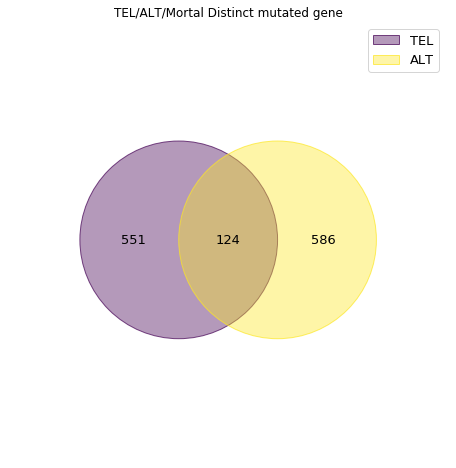

In [177]:
venn(mutated_genes_overlap)
plt.title("TEL/ALT/Mortal Distinct mutated gene")

In [181]:
sm_mg_exc_df[sm_mg_exc_df["Name"].isin(tel_list)]["Gene"].unique().shape

(675,)

In [183]:
sm_mg_exc_df[(sm_mg_exc_df['Type'].str.contains("splicing"))&(sm_mg_exc_df['Gene'].isin(tel_genes_list["Gene symbol"]))]
#For CDK13 (telomere-related gene), 3-AG loss at splicing site

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
16007,MuTect2_splicing_CDK13_JFCF_61Q_chr7_40127722_...,JFCF_6_T_1_Q,MuTect2,NaN,splicing,chr7,40127722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CDK13,NaN,NaN,CAG,TTT,NaN,NaN,NaN,.,.,.,7p14.1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
16157,MuTect2_splicing_ATAD5_JFCF_61Q_chr17_29192720...,JFCF_6_T_1_Q,MuTect2,NaN,splicing,chr17,29192720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATAD5,NaN,NaN,A,T,NaN,NaN,NaN,NM_024857:exon11:c.3137-2A>T,.,.,17q11.2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,D,.,.,.,.,.,.,.,4.327,24.0,0.987,0.981,D,.,.,.,.,0.164,0,5.38,1.062,1.178,0.986,0.987,15.48


In [184]:
sm_mg_exc_df["Type"].unique()

array(['Translocations', 'Deletion', 'Duplication', 'Inversion',
       'Insertion', 'ncRNA_exonic', 'exonic', 'splicing',
       'ncRNA_splicing'], dtype=object)

## Non-silent coding exonic mutations

In [185]:
sm_mg_ns_exc_df = sm_mg_exc_df[(sm_mg_exc_df["Type"] != "ncRNA_exonic") & (sm_mg_exc_df["Type"] != "ncRNA_splicing")]

In [186]:
sm_mg_ns_exc_df["Gene"].unique().shape
# number of mutated exonic protein coding genes

(985,)

In [187]:
sm_mg_ns_exc_df[sm_mg_ns_exc_df["Name"]=='JFCF_6_T_1J_6B']["Key"].unique().shape

(116,)

## Non-silent TelNet related short mutations and SVs

In [188]:
sm_mg_exc_tel= sm_mg_exc_df[(sm_mg_exc_df['Gene'].isin(tel_genes_list["Gene symbol"]))]
#indlucing ncRNA mutations 

In [189]:
sm_mg_exc_tel.sort_values(by=['Gene'])["Gene"].unique().shape
# 84 teloemre-related genes (exonic SVs + exonic/splicing short mutations)

(104,)

In [190]:
sm_mg_exc_tel[sm_mg_exc_tel["Source"]=="MuTect2"].sort_values(by="Gene").shape

(67, 70)

In [191]:
sm_mg_exc_tel[sm_mg_exc_tel["Source"]=="GRIDSS"].sort_values(by="Gene").shape
# 37 genes with exonic SVs

(138, 70)

## epifactor related short mutations and SVs

In [192]:
sm_mg_exc_cp= sm_mg_exc_df[(sm_mg_exc_df['Gene'].isin(epifactor_gene_list["Gene"]))]
# chromatin related mutation list (816 background)

In [193]:
sm_mg_exc_cp[sm_mg_exc_cp['Name'].isin(tel_list)]["Gene"].unique()
#23 genes

array(['ACTL6A', 'NPAS2', 'L3MBTL4', 'NCOA3', 'EYA2', 'TBL1XR1', 'CUL3',
       'SMARCA5', 'VRK1', 'ING3', 'PARG', 'KMT2A', 'PRDM7', 'PHF12',
       'HIST1H1T', 'BCORL1', 'ANP32A', 'MBD5', 'SYNCRIP', 'SP140',
       'BRCA1', 'SENP3', 'INO80C'], dtype=object)

In [194]:
sm_mg_exc_cp[sm_mg_exc_cp['Name'].isin(alt_list)].sort_values(by="Gene")["Gene"].unique()
#31 genes

array(['ASXL3', 'ATRX', 'BRWD1', 'C17orf49', 'CBX3', 'CBX4', 'CDK17',
       'CHD6', 'DNTTIP2', 'DPF3', 'EP400', 'ERCC6', 'HDAC9', 'HIST1H1T',
       'HIST1H3H', 'HIST1H4K', 'KANSL2', 'KAT6A', 'KDM5A', 'KMT2C',
       'NEK9', 'PARG', 'PHF21A', 'PRDM11', 'PRMT5', 'RPS6KA5', 'SIRT1',
       'SS18L1', 'TRIM24', 'YEATS2', 'YWHAE'], dtype=object)

# Somtaic mutation summary

## Somatic short mutations

In [195]:
sm_mg_exc_df["Type"].unique()

array(['Translocations', 'Deletion', 'Duplication', 'Inversion',
       'Insertion', 'ncRNA_exonic', 'exonic', 'splicing',
       'ncRNA_splicing'], dtype=object)

In [196]:
sm_mg_exc_df["ExonicFunc.refGene"].unique()

array([nan, '.', 'nonsynonymous SNV', 'stopgain', 'frameshift deletion',
       'nonframeshift substitution', 'unknown', 'nonframeshift insertion',
       'frameshift insertion', 'stoploss', 'nonframeshift deletion'],
      dtype=object)

In [197]:
sm_mg_exc_df[sm_mg_exc_df["Type"]=='ncRNA_exonic']["ExonicFunc.refGene"].unique()

array(['.'], dtype=object)

In [198]:
dt = np.array([["sample"]+immortal_list,
               ["Spilcing",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  ["ncRNA Exonic",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 ["ncRNA splicing",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],["Intronic",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  ["Up stream",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],["Down stream",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
           ["Up/down stream",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],     
  ["5UTR",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], ["3UTR",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],["Exonic",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  ["Synonymous",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],["Nonsynonymous SNV",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  ["Stop gain",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], ["Stop loss",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  ["Frameshift deletion",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],["Frameshift insertion",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  ["Nonframeshift substitution",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],["Nonframeshift deletion",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    ["Nonframeshift insertion",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],["Unknown",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]          ])

In [199]:
immortal_list

['JFCF_6_T_1_M',
 'JFCF_6_T_1_Q',
 'JFCF_6_T_1_D',
 'JFCF_6_T_1J_11E',
 'JFCF_6_T_1J_1_3C',
 'JFCF_6_T_1_L',
 'JFCF_6_T_1_P_ALT',
 'JFCF_6_T_1_R',
 'JFCF_6_T_5K',
 'JFCF_6_T_1_C',
 'JFCF_6_T_1_F',
 'JFCF_6_T_1_G',
 'JFCF_6_T_1_H',
 'JFCF_6_T_1J_11C',
 'JFCF_6_T_1J_6B',
 'JFCF_6_T_1_P_TEL',
 'JFCF_6_T_2H']

In [200]:
sm_short_sum = pd.DataFrame(data=dt[0:,0:])
sm_short_sum

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,sample,JFCF_6_T_1_M,JFCF_6_T_1_Q,JFCF_6_T_1_D,JFCF_6_T_1J_11E,JFCF_6_T_1J_1_3C,JFCF_6_T_1_L,JFCF_6_T_1_P_ALT,JFCF_6_T_1_R,JFCF_6_T_5K,JFCF_6_T_1_C,JFCF_6_T_1_F,JFCF_6_T_1_G,JFCF_6_T_1_H,JFCF_6_T_1J_11C,JFCF_6_T_1J_6B,JFCF_6_T_1_P_TEL,JFCF_6_T_2H
1,Spilcing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ncRNA Exonic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ncRNA splicing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Intronic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Up stream,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Down stream,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Up/down stream,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5UTR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3UTR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [201]:
sm_short_sum.shape

(21, 18)

In [202]:
for i in range(0,len(immortal_list),1):
    sm_short_sum.loc[1,i+1] = len(sm_short_all[(sm_short_all["Type"]=="splicing")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[2,i+1] = len(sm_short_all[(sm_short_all["Type"]=="ncRNA_exonic")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[3,i+1] = len(sm_short_all[(sm_short_all["Type"]=="ncRNA_splicing")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[4,i+1]= len(sm_short_all[(sm_short_all["Type"]=="intronic")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[5,i+1]= len(sm_short_all[(sm_short_all["Type"]=="upstream")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[6,i+1]= len(sm_short_all[(sm_short_all["Type"]=="downstream")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[7,i+1]= len(sm_short_all[(sm_short_all["Type"]=="upstream;downstream")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[8,i+1]= len(sm_short_all[(sm_short_all["Type"]=="UTR5")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[9,i+1]= len(sm_short_all[(sm_short_all["Type"]=="UTR3")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[10,i+1]= len(sm_short_all[(sm_short_all["Type"]=="exonic")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[11,i+1]= len(sm_short_all[(sm_short_all["ExonicFunc.refGene"]=="synonymous SNV")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[12,i+1]= len(sm_short_all[(sm_short_all["ExonicFunc.refGene"]=="nonsynonymous SNV")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[13,i+1] = len(sm_short_all[(sm_short_all["ExonicFunc.refGene"]=="stopgain")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[14,i+1]= len(sm_short_all[(sm_short_all["ExonicFunc.refGene"]=="stoploss")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[15,i+1]= len(sm_short_all[(sm_short_all["ExonicFunc.refGene"]=="frameshift deletion")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[16,i+1]= len(sm_short_all[(sm_short_all["ExonicFunc.refGene"]=="frameshift insertion")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[17,i+1]= len(sm_short_all[(sm_short_all["ExonicFunc.refGene"]=="nonframeshift substitution")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[18,i+1]= len(sm_short_all[(sm_short_all["ExonicFunc.refGene"]=="nonframeshift deletion")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[19,i+1]= len(sm_short_all[(sm_short_all["ExonicFunc.refGene"]=="nonframeshift insertion")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[20,i+1]= len(sm_short_all[(sm_short_all["ExonicFunc.refGene"]=="unknown")&(sm_short_all["Name"]==immortal_list[i])]["Key"].unique())
    sm_short_sum.loc[21,i+1] = sum(sm_short_sum[i+1][1:11])
sm_short_sum.loc[21,0] = "total somatic mutation "

In [128]:
sm_short_sum

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,sample,JFCF_6_T_1_M,JFCF_6_T_1_Q,JFCF_6_T_1_D,JFCF_6_T_1J_11E,JFCF_6_T_1J_1_3C,JFCF_6_T_1_L,JFCF_6_T_1_P_ALT,JFCF_6_T_1_R,JFCF_6_T_5K,JFCF_6_T_1_C,JFCF_6_T_1_F,JFCF_6_T_1_G,JFCF_6_T_1_H,JFCF_6_T_1J_11C,JFCF_6_T_1J_6B,JFCF_6_T_1_P_TEL,JFCF_6_T_2H
1,Spilcing,3,5,1,2,2,2,1,2,1,4,1,2,1,2,1,3,1
2,ncRNA Exonic,27,47,17,44,77,35,26,34,30,28,24,20,38,41,64,33,15
3,ncRNA splicing,3,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0
4,Intronic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Up stream,35,67,33,50,119,38,42,36,36,50,42,47,45,54,110,32,33
6,Down stream,52,62,33,50,102,35,40,39,42,44,45,30,40,60,129,23,26
7,Up/down stream,1,1,1,0,3,3,1,1,5,1,2,3,1,0,3,1,1
8,5UTR,10,9,9,10,23,10,9,8,10,9,10,11,9,14,20,8,9
9,3UTR,111,123,50,68,147,57,46,75,53,57,49,46,51,55,189,50,29


In [203]:
sm_mg_exc_df[(sm_mg_exc_df["Type"]=="exonic")&(sm_mg_exc_df["Name"]=="JFCF_6_T_1J_6B")]["Key"].unique().shape

(94,)

# Non-silent somatic coding exonic short mutation and SVs analysis (?)

## Mutated genes (indluding ncRNA)

In [204]:
sm_mg_exc_df.shape

(2157, 70)

In [205]:
sm_mg_exc_df.drop_duplicates(
    subset=sm_mg_exc_df.columns.values[sm_mg_exc_df.columns.values !='Consequence'])
#  just SV data may annotate the same mutation with differnt 'Consequence'
sm_mg_exc_df.shape

(2157, 70)

In [206]:
sm_mg_exc_df.drop_duplicates(
    subset=sm_mg_exc_df.columns.values[sm_mg_exc_df.columns.values !='Consequence']).drop_duplicates(
    subset=['Key', 'Name']).shape
#  just SV data may annotate the same mutation with differnt 'Consequence'

(1892, 70)

In [207]:
sm_mg_exc_u = sm_mg_exc_df.drop_duplicates(
    subset=sm_mg_exc_df.columns.values[sm_mg_exc_df.columns.values !='Consequence'])
# remove duplicate keys accroding to 'Consequence' ---> u represents for unique

In [208]:
sm_mg_exc_ALT = sm_mg_exc_u[sm_mg_exc_u['Name'].isin(alt_list)]
sm_mg_exc_TEL = sm_mg_exc_u[sm_mg_exc_u['Name'].isin(tel_list)]

In [209]:
mutated_genes = {
    'TEL': set(sm_mg_exc_TEL['Gene']),
    'ALT': set(sm_mg_exc_ALT['Gene'])
}

Text(0.5, 1.0, 'TEL/ALT/Mortal Distinct mutated gene')

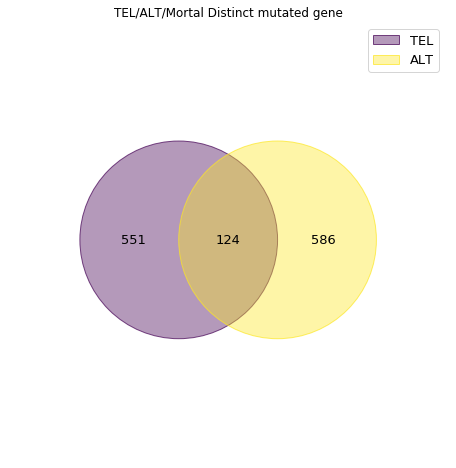

In [210]:
venn(mutated_genes)
plt.title("TEL/ALT/Mortal Distinct mutated gene")

In [211]:
exc_ALT_mutations = sm_mg_exc_ALT[['Gene', 'Name']].drop_duplicates().groupby(
    ['Gene']).size().sort_values(ascending=False).reset_index(name='count_ALT')

In [212]:
exc_ALT_mutations

,Gene,count_ALT
0,ATRX,9
1,TUG1,7
2,LINC02746,7
3,LOC105371855,7
4,CDH1,7
5,LINC02280,7
6,SERPINA12,6
7,SBSN,6
8,APOB,6
9,LINC00894,5


In [213]:
exc_TEL_mutations = sm_mg_exc_TEL[['Gene', 'Name']].drop_duplicates().groupby(
    ['Gene']).size().sort_values(ascending=False).reset_index(name='count_TEL')

In [214]:
exc_TEL_mutations

,Gene,count_TEL
0,ZNF827,6
1,SERPINA12,6
2,LINC02746,6
3,LOC105371855,6
4,NBPF20,5
5,LINC01535,5
6,TUG1,5
7,MUC4,5
8,CDH1,5
9,SBSN,5


In [215]:
sm_mg_exc_AT = pd.merge(
    exc_ALT_mutations,
        exc_TEL_mutations, how='outer').fillna(0)

## Fisher test (including ncRNA)

In [216]:
sm_mg_exc_AT['p_value'] = sm_mg_exc_AT.apply(lambda row: fisher_exact(
    np.array([[row['count_ALT'], row['count_TEL']],
              [9 - row['count_ALT'], 8 - row['count_TEL']]]))[1], axis=1)
sm_mg_exc_AT['p_value_less'] = sm_mg_exc_AT.apply(lambda row: fisher_exact(
    np.array([[row['count_ALT'], row['count_TEL']],
              [9 - row['count_ALT'], 8 - row['count_TEL']]]), alternative='less')[1], axis=1)
sm_mg_exc_AT['p_value_greater'] = sm_mg_exc_AT.apply(lambda row: fisher_exact(
    np.array([[row['count_ALT'], row['count_TEL']],
              [9 - row['count_ALT'], 8 - row['count_TEL']]]), alternative='greater')[1], axis=1)

In [217]:
sm_mg_exc_AT=sm_mg_exc_AT.sort_values(by="p_value") # 1,261 genes 
sm_mg_exc_AT

,Gene,count_ALT,count_TEL,p_value,p_value_less,p_value_greater
0,ATRX,9.0,0.0,0.000041,1.000000,0.000041
706,NBPF20,1.0,5.0,0.049774,0.042986,0.997738
14,LOC101929322,4.0,0.0,0.082353,1.000000,0.052941
710,CSMD3,0.0,3.0,0.082353,0.082353,1.000000
711,MYO9B,0.0,3.0,0.082353,0.082353,1.000000
712,GOLGA6L3,0.0,3.0,0.082353,0.082353,1.000000
713,LOC729683,0.0,3.0,0.082353,0.082353,1.000000
185,LINC00504,1.0,4.0,0.131222,0.110860,0.990950
744,LOC729603,0.0,2.0,0.205882,0.205882,1.000000
731,PSMD3,0.0,2.0,0.205882,0.205882,1.000000


In [218]:
mg_exc_df[(mg_exc_df["Gene"].str.contains("LOC101929322"))&(~mg_exc_df['Key'].str.contains("Immortal"))
          &(~mg_exc_df['Key'].str.contains("Mortal"))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
13668,MuTect2_ncRNA_exonic_LOC101929322_JFCF-6_T_1_P...,JFCF_6_T_1_P_ALT,MuTect2,NaN,ncRNA_exonic,chr7,64962667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOC101929322,NaN,NaN,A,T,NaN,NaN,NaN,.,.,.,7q11.21,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
14581,MuTect2_ncRNA_exonic_LOC101929322_JFCF6_T_1J_1...,JFCF_6_T_1J_1_3C,MuTect2,NaN,ncRNA_exonic,chr7,64960980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOC101929322,NaN,NaN,A,T,NaN,NaN,NaN,.,.,.,7q11.21,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
15680,MuTect2_ncRNA_exonic_LOC101929322_JFCF_61M_chr...,JFCF_6_T_1_M,MuTect2,NaN,ncRNA_exonic,chr7,64962671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOC101929322,NaN,NaN,C,T,NaN,NaN,NaN,.,.,.,7q11.21,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
16008,MuTect2_ncRNA_exonic_LOC101929322_JFCF_61Q_chr...,JFCF_6_T_1_Q,MuTect2,NaN,ncRNA_exonic,chr7,64960240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOC101929322,NaN,NaN,G,A,NaN,NaN,NaN,.,.,.,7q11.21,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.


In [219]:
sm_mg_exc_AT[sm_mg_exc_AT["Gene"].isin(tel_genes_list["Gene symbol"])].sort_values(by=["count_ALT"],ascending=False)
# 84 telomere-related genes 

,Gene,count_ALT,count_TEL,p_value,p_value_less,p_value_greater
0,ATRX,9.0,0.0,0.000041,1.000000,0.000041
10,ZNF827,4.0,6.0,0.334842,0.217812,0.963595
22,SLC25A5,3.0,3.0,1.000000,0.626697,0.753394
61,HDAC9,2.0,0.0,0.470588,1.000000,0.264706
72,CABP2,2.0,2.0,1.000000,0.664706,0.758824
55,GMDS,2.0,2.0,1.000000,0.664706,0.758824
59,DMD,2.0,1.0,1.000000,0.876471,0.547059
45,SCYL1,2.0,0.0,0.470588,1.000000,0.264706
70,IDH3A,2.0,0.0,0.470588,1.000000,0.264706
165,KMT5C,1.0,0.0,1.000000,1.000000,0.529412


In [220]:
sm_mg_exc_AT[sm_mg_exc_AT["Gene"].isin(top_tel_genes_list["Gene symbol"])].sort_values(by=["count_ALT"],ascending=False)
# 14 top telomere-related genes (Telnet score > 2)

,Gene,count_ALT,count_TEL,p_value,p_value_less,p_value_greater
0,ATRX,9.0,0.0,0.000041,1.000000,0.000041
10,ZNF827,4.0,6.0,0.334842,0.217812,0.963595
45,SCYL1,2.0,0.0,0.470588,1.000000,0.264706
361,CTC1,1.0,0.0,1.000000,1.000000,0.529412
420,SIRT1,1.0,0.0,1.000000,1.000000,0.529412
165,KMT5C,1.0,0.0,1.000000,1.000000,0.529412
141,HIST1H3H,1.0,0.0,1.000000,1.000000,0.529412
151,HIST1H4K,1.0,0.0,1.000000,1.000000,0.529412
216,FANCD2,1.0,0.0,1.000000,1.000000,0.529412
231,BMP2K,1.0,0.0,1.000000,1.000000,0.529412


In [231]:
sm_mg_exc_AT[sm_mg_exc_AT["Gene"].isin(epifactor_gene_list["Gene"])].sort_values(by=["count_ALT","Gene"],ascending=False)
# 33 chromatin-related genes

,Gene,count_ALT,count_TEL,p_value,p_value_less,p_value_greater
0,ATRX,9.0,0.0,0.000041,1.000000,0.000041
62,HIST1H1T,2.0,1.0,1.000000,0.876471,0.547059
61,HDAC9,2.0,0.0,0.470588,1.000000,0.264706
28,CHD6,2.0,0.0,0.470588,1.000000,0.264706
468,YWHAE,1.0,0.0,1.000000,1.000000,0.529412
469,YEATS2,1.0,0.0,1.000000,1.000000,0.529412
527,TRIM24,1.0,0.0,1.000000,1.000000,0.529412
505,SS18L1,1.0,0.0,1.000000,1.000000,0.529412
420,SIRT1,1.0,0.0,1.000000,1.000000,0.529412
397,RPS6KA5,1.0,0.0,1.000000,1.000000,0.529412


In [232]:
sm_mg_exc_ALT_pv = sm_mg_exc_ALT.groupby(['Name', 'Gene']).size()
sm_mg_exc_ALT_pv = sm_mg_exc_ALT_pv.reset_index(name='count')
sm_mg_exc_ALT_pv = sm_mg_exc_ALT_pv.pivot(columns='Name', index='Gene', values='count').fillna(0)

In [233]:
sm_mg_exc_TEL_pv = sm_mg_exc_TEL.groupby(['Name', 'Gene']).size()
sm_mg_exc_TEL_pv = sm_mg_exc_TEL_pv.reset_index(name='count')
sm_mg_exc_TEL_pv = sm_mg_exc_TEL_pv.pivot(columns='Name', index='Gene', values='count').fillna(0)

In [234]:
sm_mg_exc_pv = pd.merge(sm_mg_exc_ALT_pv,sm_mg_exc_TEL_pv,how="outer", on='Gene').fillna(0)

In [235]:
sm_mg_exc_pv

Name,JFCF_6_T_1J_11E,JFCF_6_T_1J_1_3C,JFCF_6_T_1_D,JFCF_6_T_1_L,JFCF_6_T_1_M,JFCF_6_T_1_P_ALT,JFCF_6_T_1_Q,JFCF_6_T_1_R,JFCF_6_T_5K,JFCF_6_T_1J_11C,JFCF_6_T_1J_6B,JFCF_6_T_1_C,JFCF_6_T_1_F,JFCF_6_T_1_G,JFCF_6_T_1_H,JFCF_6_T_1_P_TEL,JFCF_6_T_2H
Gene,,,,,,,,,,,,,,,,,
A2M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABI1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACAA2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACACA,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACOXL-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACTN3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACTR1A,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [236]:
sm_mg_exc_pv.to_csv("../results/Splited_SM_MG_EXC_GeneCount_non-silent_20200621.csv", index=1)

### Mutiple testing ( FDR)

In [328]:
def fdr(p_vals):

    from scipy.stats import rankdata
    ranked_p_values = rankdata(p_vals)
    fdr = p_vals * len(p_vals) / ranked_p_values
    fdr[fdr > 1] = 1

    return fdr
# method 1

In [336]:
import statsmodels.stats.multitest as multi
# method 2

In [363]:
sm_mg_exc_AT['FDR'] = multi.multipletests(sm_mg_exc_AT['p_value'], alpha=0.05, method='fdr_bh', is_sorted=1, returnsorted=0)[1]

In [367]:
sm_mg_exc_AT.head(10)

,Gene,count_ALT,count_TEL,p_value,p_value_less,p_value_greater,FDR
0,ATRX,9.0,0.0,0.000041,1.000000,0.000041,0.053764
12,LOC101929322,4.0,0.0,0.082353,1.000000,0.052941,0.965555
13,PRKXP1,4.0,0.0,0.082353,1.000000,0.052941,0.965555
725,GOLGA6L3,0.0,3.0,0.082353,0.082353,1.000000,0.965555
726,CSMD3,0.0,3.0,0.082353,0.082353,1.000000,0.965555
727,AUTS2,0.0,3.0,0.082353,0.082353,1.000000,0.965555
728,LOC729683,0.0,3.0,0.082353,0.082353,1.000000,0.965555
729,MYO9B,0.0,3.0,0.082353,0.082353,1.000000,0.965555
387,LINC00504,1.0,4.0,0.131222,0.110860,0.990950,0.965555
739,GSDMA&PSMD3,0.0,2.0,0.205882,0.205882,1.000000,0.965555


## TelNet telomere-related genes- mannual check

### ALT

In [248]:
sm_mg_exc_df[(sm_mg_exc_df['Name']=="JFCF_6_T_1J_11E")&(sm_mg_exc_df['Gene'].isin(tel_genes_list["Gene symbol"]))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
10640,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146807211_1...,JFCF_6_T_1J_11E,GRIDSS,False,Deletion,chr4,146807211-146807212,chr4,146823317-146823318,NotSplit:165.69;Split:168.24,NotSplit:165.69;Split:168.24,NaN,NaN,NotSplit:9;Split:6,NotSplit:9;Split:6,ZNF827,gene_fusion&frameshift_variant,HIGH,A,AGGCTTTCCACTTTCCTCTTCTGAGG[CHR4:146823318[,C,]CHR4:146807212]GGCTTTCCACTTTCCTCTTCTGAGGC,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10660,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146824366_1...,JFCF_6_T_1J_11E,GRIDSS,False,Deletion,chr4,146824366-146824367,chr4,146859516-146859517,NotSplit:73.64;Split:255.73,NotSplit:73.64;Split:255.73,NaN,NaN,NotSplit:4;Split:9,NotSplit:4;Split:9,ZNF827,gene_fusion,HIGH,T,T[CHR4:146859517[,G,]CHR4:146824367]G,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11285,SV_GRIDSS_HIGH_RRAS2_Somatic_chr11_14363093_14...,JFCF_6_T_1J_11E,GRIDSS,False,Duplication,chr11,14363093-14363094,chr11,14457541-14457542,NotSplit:147.28;Split:79.95,NotSplit:147.28;Split:79.95,NaN,NaN,NotSplit:8;Split:3,NotSplit:8;Split:3,RRAS2,transcript_ablation,HIGH,A,]CHR11:14457542]TAAGA,T,TTAAG[CHR11:14363094[,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11298,SV_GRIDSS_HIGH_IDH3A_Somatic_chr15_78454830_78...,JFCF_6_T_1J_11E,GRIDSS,False,Inversion,chr15,78454830-78454833,chr15,78456196-78456199,NotSplit:220.92;Split:105.3,NotSplit:220.92;Split:105.3,NaN,NaN,NotSplit:12;Split:4,NotSplit:12;Split:4,IDH3A,bidirectional_gene_fusion,HIGH,A,A]CHR15:78456198],T,T]CHR15:78454832],2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11314,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76853017_7685...,JFCF_6_T_1J_11E,GRIDSS,False,Deletion,chrX,76853017-76853018,chrX,77014863-77014864,NotSplit:239.33;Split:302.85,NotSplit:239.33;Split:302.85,NaN,NaN,NotSplit:13;Split:12,NotSplit:13;Split:12,ATRX,gene_fusion&frameshift_variant,HIGH,A,A[CHRX:77014864[,A,]CHRX:76853018]A,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12034,MuTect2_exonic_SIRT1_JFCF-6_T_1J_11E_chr10_696...,JFCF_6_T_1J_11E,MuTect2,NaN,exonic,chr10,69672515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SIRT1,NaN,NaN,G,C,NaN,NaN,NaN,.,nonsynonymous SNV,"SIRT1:NM_001314049:exon6:c.G733C:p.D245H,SIRT1...",10q21.3,.,.,.,.,.,.,.,.,.,0.085,T,0.002,B,0.005,B,0.008,N,0.999,D,0.695,N,2.45,T,-1.39,N,0.375,2.085,16.76,0.975,0.770,D,-1.099,T,0.041,T,0.672,0,4.11,0.917,1.048,0.998,0.970,8.877
12049,MuTect2_exonic_SCYL1_JFCF-6_T_1J_11E_chr11_652...,JFCF_6_T_1J_11E,MuTect2,NaN,exonic,

In [249]:
sm_mg_exc_df[(sm_mg_exc_df['Name']=="JFCF_6_T_1J_1_3C")&(sm_mg_exc_df['Gene'].isin(tel_genes_list["Gene symbol"]))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
11299,SV_GRIDSS_HIGH_IDH3A_Somatic_chr15_78454830_78...,JFCF_6_T_1J_1_3C,GRIDSS,False,Inversion,chr15,78454830-78454833,chr15,78456196-78456199,NotSplit:253.27;Split:403.07,NotSplit:253.27;Split:403.07,NaN,NaN,NotSplit:14;Split:16,NotSplit:14;Split:16,IDH3A,bidirectional_gene_fusion,HIGH,A,A]CHR15:78456198],T,T]CHR15:78454832],2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11315,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76853017_7685...,JFCF_6_T_1J_1_3C,GRIDSS,False,Deletion,chrX,76853017-76853018,chrX,77014863-77014864,NotSplit:343.72;Split:285.82,NotSplit:343.72;Split:285.82,NaN,NaN,NotSplit:19;Split:11,NotSplit:19;Split:11,ATRX,gene_fusion&frameshift_variant,HIGH,A,A[CHRX:77014864[,A,]CHRX:76853018]A,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14527,MuTect2_exonic_HSPA4L_JFCF6_T_1J_1-3C_chr4_128...,JFCF_6_T_1J_1_3C,MuTect2,NaN,exonic,chr4,128722373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HSPA4L,NaN,NaN,G,C,NaN,NaN,NaN,.,nonsynonymous SNV,"HSPA4L:NM_001317383:exon4:c.G387C:p.L129F,HSPA...",4q28.1,.,.,.,.,.,.,.,.,.,0.001,D,1.0,D,0.999,D,0.000,D,1.000,D,3.245,M,5.26,T,-3.77,D,0.929,5.584,26.5,0.998,0.835,D,-1.171,T,0.018,T,0.651,0,3.46,0.917,1.045,0.998,0.997,4.680
14657,MuTect2_exonic_CABP2_JFCF6_T_1J_1-3C_chr11_672...,JFCF_6_T_1J_1_3C,MuTect2,NaN,exonic,chr11,67290074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CABP2,NaN,NaN,G,T,NaN,NaN,NaN,.,nonsynonymous SNV,"CABP2:NM_001318496:exon2:c.C170A:p.T57K,CABP2:...",11q13.2,.,.,.,.,.,.,.,.,.,0.311,T,0.0,B,0.001,B,0.001,N,1.000,N,0.345,N,-0.48,T,-1.45,N,0.02,1.851,15.29,0.982,0.778,D,-0.940,T,0.189,T,0.497,0,1.5,0.917,1.048,0.989,0.989,5.006
14733,MuTect2_exonic_SYNE2_JFCF6_T_1J_1-3C_chr14_646...,JFCF_6_T_1J_1_3C,MuTect2,NaN,exonic,chr14,64682064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SYNE2,NaN,NaN,C,T,NaN,NaN,NaN,.,nonsynonymous SNV,"SYNE2:NM_182913:exon2:c.C296T:p.A99V,SYNE2:NM_...",14q23.2,8.289e-06,0,0,0,0,1.5e-05,0,0,rs762635611,0.223,T,0.997,D,0.886,P,0.001,N,1,D,2.215,M,4.11,T,-1.34,N,0.246,5.117,25.4,0.998,0.893,D,-0.752,T,0.242,T,0.707,0,5.04,0.871,0.935,1.000,1.000,13.539
14762,MuTect2_exonic_IDH3A_JFCF6_T_1J_1-3C_chr15_784...,JFCF_6_T_1J_1_3C,MuTect2,NaN,exonic,chr15,78456088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDH3A,NaN,NaN,C,T,NaN,NaN,NaN,.,nonsynonymous SNV,IDH3A:NM_005530:exon8:c.C745T:p.L249F,15q25.1,.,.,.,.,.,.,.,.,.,0.014,D,1.0,D,1.0,D,0.000,D,1,D,2.595,M,0.35,T,-3.52,D,0.875,6.554,31,0.999,0.957,D,-0.288,T,0.361,T,0.732,0,5.96,0.871,0.935,1.000,1.000,12.681
14856,MuTect2_exonic_ANKLE1_JFCF6_T_1J_1-3C_chr19_17...,JFCF_6_T_1J_1_3C,MuTect2,NaN,exonic,chr19,17397477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ANKLE1,NaN,NaN,G,T,NaN,NaN,NaN,.,nonsynonymous SNV,ANKLE1:NM_001278444:exon8:c.G1747T:p.V583L,19p13.11,0.0159,0.0541,0,0,.,0.0187,0,0.0128,rs13345098,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
23926,SV_GRIDSS_HIGH_GMDS&GMDS-AS1_Somatic_chr6_2241...,JFCF_6_T

In [250]:
sm_mg_exc_df[(sm_mg_exc_df['Name']=="JFCF_6_T_1_D")&(sm_mg_exc_df['Gene'].isin(tel_genes_list["Gene symbol"]))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
1062,SV_GRIDSS_HIGH_DMD_Somatic_chr4_191033031_1910...,JFCF_6_T_1_D,GRIDSS,False,Translocations,chr4,191033031-191033033,chrX,32765190-32765192,NotSplit:124.64;Split:79.03,NotSplit:124.64;Split:79.03,NaN,NaN,NotSplit:7;Split:3,NotSplit:7;Split:3,DMD,transcript_ablation,HIGH,C,C[CHRX:32765191[,T,]CHR4:191033032]T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10655,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146824366_1...,JFCF_6_T_1_D,GRIDSS,False,Deletion,chr4,146824366-146824367,chr4,146859516-146859517,NotSplit:17.81;Split:112.35,NotSplit:17.81;Split:112.35,NaN,NaN,NotSplit:1;Split:4,NotSplit:1;Split:4,ZNF827,gene_fusion,HIGH,T,T[CHR4:146859517[,G,]CHR4:146824367]G,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10897,SV_GRIDSS_HIGH_TENM3_Somatic_chr4_183582935_18...,JFCF_6_T_1_D,GRIDSS,False,Duplication,chr4,183582935-183582936,chr4,183653580-183653581,NotSplit:231.47;Split:161.34,NotSplit:231.47;Split:161.34,NaN,NaN,NotSplit:13;Split:6,NotSplit:13;Split:6,TENM3,gene_fusion&frameshift_variant,HIGH,T,]CHR4:183653581]AT,C,CA[CHR4:183582936[,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10899,SV_GRIDSS_HIGH_HIST1H3H_Somatic_chr6_27777914_...,JFCF_6_T_1_D,GRIDSS,False,Deletion,chr6,27777914-27777915,chr6,27907674-27907675,NotSplit:195.86;Split:90.19,NotSplit:195.86;Split:90.19,NaN,NaN,NotSplit:11;Split:3,NotSplit:11;Split:3,HIST1H3H,transcript_ablation,HIGH,G,GTGTCTTTATGAATCCACCAAGGCCAG[CHR6:27907675[,C,]CHR6:27777915]TGTCTTTATGAATCCACCAAGGCCAGC,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10903,SV_GRIDSS_HIGH_SND1_Somatic_chr7_127355405_127...,JFCF_6_T_1_D,GRIDSS,False,Duplication,chr7,127355405-127355407,chr7,127443584-127443586,NotSplit:213.66;Split:207.93,NotSplit:213.66;Split:207.93,NaN,NaN,NotSplit:12;Split:8,NotSplit:12;Split:8,SND1,gene_fusion,HIGH,T,]CHR7:127443585]T,T,T[CHR7:127355406[,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10929,SV_GRIDSS_HIGH_ZC3H18_Somatic_chr16_88677731_8...,JFCF_6_T_1_D,GRIDSS,False,Duplication,chr16,88677731-88677734,chr16,88756227-88756230,NotSplit:160.25;Split:123.82,NotSplit:160.25;Split:123.82,NaN,NaN,NotSplit:9;Split:5,NotSplit:9;Split:5,ZC3H18,transcript_ablation,HIGH,G,]CHR16:88756229]G,G,G[CHR16:88677733[,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10943,SV_GRIDSS_HIGH_ATRX_Somatic_ch

In [251]:
sm_mg_exc_df[(sm_mg_exc_df['Name']=="JFCF_6_T_1_L")&(sm_mg_exc_df['Gene'].isin(tel_genes_list["Gene symbol"]))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
10641,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146807211_1...,JFCF_6_T_1_L,GRIDSS,False,Deletion,chr4,146807211-146807212,chr4,146823317-146823318,NotSplit:273.96;Split:147.4,NotSplit:273.96;Split:147.4,NaN,NaN,NotSplit:15;Split:5,NotSplit:15;Split:5,ZNF827,gene_fusion&frameshift_variant,HIGH,A,AGGCTTTCCACTTTCCTCTTCTGAGG[CHR4:146823318[,C,]CHR4:146807212]GGCTTTCCACTTTCCTCTTCTGAGGC,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10661,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146824366_1...,JFCF_6_T_1_L,GRIDSS,False,Deletion,chr4,146824366-146824367,chr4,146859516-146859517,NotSplit:18.26;Split:169.11,NotSplit:18.26;Split:169.11,NaN,NaN,NotSplit:1;Split:6,NotSplit:1;Split:6,ZNF827,gene_fusion,HIGH,T,T[CHR4:146859517[,G,]CHR4:146824367]G,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11385,SV_GRIDSS_HIGH_NUDCD2_Somatic_chr5_162872717_1...,JFCF_6_T_1_L,GRIDSS,False,Inversion,chr5,162872717-162872718,chr5,162883261-162883262,NotSplit:0;Split:144.62,NotSplit:0;Split:144.62,NaN,NaN,NotSplit:0;Split:5,NotSplit:0;Split:5,NUDCD2,transcript_ablation,HIGH,T,[CHR5:162883262[AT,A,[CHR5:162872718[TA,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11393,SV_GRIDSS_HIGH_HELZ_Somatic_chr17_65207655_652...,JFCF_6_T_1_L,GRIDSS,False,Inversion,chr17,65207655-65207656,chr17,69378682-69378683,NotSplit:219.17;Split:218.38,NotSplit:219.17;Split:218.38,NaN,NaN,NotSplit:12;Split:7,NotSplit:12;Split:7,HELZ,transcript_ablation,HIGH,T,TTGGTCCAGTCGCCCAGGTATTTTATTTGG]CHR17:69378683],T,TCCAAATAAAATACCTGGGCGACTGGACCA]CHR17:65207656],916.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11395,SV_GRIDSS_HIGH_PHLPP1_Somatic_chr18_60520655_6...,JFCF_6_T_1_L,GRIDSS,False,Deletion,chr18,60520655-60520658,chr18,60539325-60539328,NotSplit:164.37;Split:26.86,NotSplit:164.37;Split:26.86,NaN,NaN,NotSplit:9;Split:1,NotSplit:9;Split:1,PHLPP1,gene_fusion&frameshift_variant,HIGH,C,C[CHR18:60539327[,A,]CHR18:60520657]A,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11397,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76795540_7679...,JFCF_6_T_1_L,GRIDSS,False,Deletion,chrX,76795540-76795542,chrX,76940486-76940488,NotSplit:237.43;Split:194.13,NotSplit:237.43;Split:194.13,NaN,NaN,NotSplit:13;Split:7,NotSplit:13;Split:7,ATRX,gene_fusion,HIGH,T,T[CHRX:76940487[,C,]CHRX:76795541]C,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [252]:
sm_mg_exc_df[(sm_mg_exc_df['Name']=="JFCF_6_T_1_M")&(sm_mg_exc_df['Gene'].isin(tel_genes_list["Gene symbol"]))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
200,SV_GRIDSS_HIGH_DMD_Somatic_chr7_118228129_1182...,JFCF_6_T_1_M,GRIDSS,False,Translocations,chr7,118228129-118228131,chrX,32056726-32056728,NotSplit:259.78;Split:137.5,NotSplit:259.78;Split:137.5,NaN,NaN,NotSplit:14;Split:5,NotSplit:14;Split:5,DMD,transcript_ablation,HIGH,G,G]CHRX:32056728],C,C]CHR7:118228130],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,SV_GRIDSS_HIGH_TCOF1_Somatic_chr5_149759805_14...,JFCF_6_T_1_M,GRIDSS,False,Duplication,chr5,149759805-149759808,chr5,149945464-149945467,NotSplit:74.22;Split:108.66,NotSplit:74.22;Split:108.66,NaN,NaN,NotSplit:4;Split:4,NotSplit:4;Split:4,TCOF1,transcript_ablation,HIGH,A,]CHR5:149945466]A,G,G[CHR5:149759807[,127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10370,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76885052_7688...,JFCF_6_T_1_M,GRIDSS,False,Duplication,chrX,76885052-76885055,chrX,76923999-76924002,NotSplit:204.12;Split:318.66,NotSplit:204.12;Split:318.66,NaN,NaN,NotSplit:11;Split:12,NotSplit:11;Split:12,ATRX,gene_fusion&frameshift_variant,HIGH,G,]CHRX:76924001]G,A,A[CHRX:76885054[,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15609,MuTect2_exonic_TAGLN2_JFCF_61M_chr1_159890255_C_A,JFCF_6_T_1_M,MuTect2,NaN,exonic,chr1,159890255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TAGLN2,NaN,NaN,C,A,NaN,NaN,NaN,.,nonsynonymous SNV,"TAGLN2:NM_001277223:exon2:c.G45T:p.Q15H,TAGLN2...",1q23.2,.,.,.,.,.,.,.,.,.,0.048,D,1.0,D,0.999,D,0.000,U,1.000,D,2.835,M,0.13,T,-3.11,D,0.748,6.010,27.9,0.997,0.940,D,-0.325,T,0.324,T,0.732,0,3.91,0.871,0.931,1.000,1.000,11.028
15723,MuTect2_exonic_DCLRE1A_JFCF_61M_chr10_11560980...,JFCF_6_T_1_M,MuTect2,NaN,exonic,chr10,115609804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DCLRE1A,NaN,NaN,C,A,NaN,NaN,NaN,.,nonsynonymous SNV,"DCLRE1A:NM_014881:exon2:c.G1060T:p.D354Y,DCLRE...",10q25.3,.,.,.,.,.,.,.,.,.,0.006,D,0.976,D,0.556,P,0.947,N,1,N,1.445,L,-0.18,T,-1.24,N,0.29,4.722,24.6,0.990,0.117,N,-0.889,T,0.207,T,0.566,0,0.345,0.033,0.935,0.003,0.035,4.987
15733,MuTect2_exonic_AHNAK_JFCF_61M_chr11_62289368_A_G,JFCF_6_T_1_M,MuTect2,NaN,exonic,chr11,62289368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AHNAK,NaN,NaN,A,G,NaN,NaN,NaN,.,nonsynonymous SNV,"AHNAK:NM_001346445:exon5:c.T12521C:p.V4174A,AH...",11q12.3,1.647e-05,0,0,0,0,2.997e-05,0,0,rs773492260,0.413,T,0.0,B,0.001,B,0.479,N,1,N,-0.645,N,3.51,T,-0.73,N,0.035,-2.012,0.001,0.239,0.013,N,-0.915,T,0.007,T,0.706,0,-7.0,-0.352,-1.189,0.064,0.016,12.295
15763,MuTect2_exonic_PRMT5_JFCF_61M_chr14_23392336_G_A,JFCF_6_T_1_M,MuTect2,NaN,exonic,chr14,23392336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRMT5,NaN,NaN,G,A,NaN,NaN,NaN,.,nonsynonymous SNV,"PRMT5:NM_001282956:exon9:c.C896T:p.S299F,PRMT5...",14q11.2,.,.,.,.,.,.,.,.,.,0.009,D,1.0,D,1.0,D,0.000,D,1,D,3.675,H,1.94,T,-5.87,D,0.985,6.242,

In [253]:
sm_mg_exc_df[(sm_mg_exc_df['Name']=="JFCF_6_T_1_P_ALT")&(sm_mg_exc_df['Gene'].isin(tel_genes_list["Gene symbol"]))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
10642,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146807211_1...,JFCF_6_T_1_P_ALT,GRIDSS,False,Deletion,chr4,146807211-146807212,chr4,146823317-146823318,NotSplit:491.15;Split:286.55,NotSplit:491.15;Split:286.55,NaN,NaN,NotSplit:27;Split:10,NotSplit:27;Split:10,ZNF827,gene_fusion&frameshift_variant,HIGH,A,AGGCTTTCCACTTTCCTCTTCTGAGG[CHR4:146823318[,C,]CHR4:146807212]GGCTTTCCACTTTCCTCTTCTGAGGC,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10662,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146824366_1...,JFCF_6_T_1_P_ALT,GRIDSS,False,Deletion,chr4,146824366-146824367,chr4,146859516-146859517,NotSplit:72.76;Split:476.68,NotSplit:72.76;Split:476.68,NaN,NaN,NotSplit:4;Split:18,NotSplit:4;Split:18,ZNF827,gene_fusion,HIGH,T,T[CHR4:146859517[,G,]CHR4:146824367]G,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11399,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146767164_1...,JFCF_6_T_1_P_ALT,GRIDSS,False,Deletion,chr4,146767164-146767168,chr4,146770473-146770477,NotSplit:18.19;Split:128.54,NotSplit:18.19;Split:128.54,NaN,NaN,NotSplit:1;Split:5,NotSplit:1;Split:5,ZNF827,gene_fusion&frameshift_variant,HIGH,C,C[CHR4:146770475[,T,]CHR4:146767166]T,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11405,SV_GRIDSS_HIGH_PDS5B_Somatic_chr13_33339268_33...,JFCF_6_T_1_P_ALT,GRIDSS,False,Inversion,chr13,33339268-33339271,chr13,55239872-55239875,NotSplit:145.53;Split:29,NotSplit:145.53;Split:29,NaN,NaN,NotSplit:8;Split:1,NotSplit:8;Split:1,PDS5B,transcript_ablation,HIGH,A,[CHR13:55239874[A,T,[CHR13:33339270[T,3115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11429,SV_GRIDSS_HIGH_PIGN_Somatic_chr18_59737426_597...,JFCF_6_T_1_P_ALT,GRIDSS,False,Inversion,chr18,59737426-59737427,chr18,64026474-64026475,NotSplit:72.76;Split:133.13,NotSplit:72.76;Split:133.13,NaN,NaN,NotSplit:4;Split:5,NotSplit:4;Split:5,PIGN,transcript_ablation,HIGH,A,A]CHR18:64026475],G,G]CHR18:59737427],579.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13689,MuTect2_exonic_ARHGAP12_JFCF-6_T_1_PALT_chr10_...,JFCF_6_T_1_P_ALT,MuTect2,NaN,exonic,chr10,32197723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARHGAP12,NaN,NaN,A,C,NaN,NaN,NaN,.,nonsynonymous SNV,"ARHGAP12:NM_001270699:exon1:c.T61G:p.Y21D,ARHG...",10p11.22,.,.,.,.,.,.,.,.,.,0.003,D,1.0,D,0.992,D,0.000,D,1.000,D,2.445,M,0.42,T,-5.74,D,0.902,5.305,25.8,0.992,0.990,D,-0.272,T,0.359,T,0.707,0,5.73,1.062,1.199,1.000,1.000,16.013
13789,MuTect2_exonic_ATRX_JFCF-6_T_1_PALT_chrX_76938...,JFCF_6_T_1_P_ALT,MuTect2,NaN,exonic,chrX

In [254]:
sm_mg_exc_df[(sm_mg_exc_df['Name']=="JFCF_6_T_1_Q")&(sm_mg_exc_df['Gene'].isin(tel_genes_list["Gene symbol"]))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
10591,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76808603_7680...,JFCF_6_T_1_Q,GRIDSS,False,Deletion,chrX,76808603-76808606,chrX,76875533-76875536,NotSplit:141.33;Split:96.28,NotSplit:141.33;Split:96.28,NaN,NaN,NotSplit:8;Split:4,NotSplit:8;Split:4,ATRX,gene_fusion&frameshift_variant,HIGH,C,C[CHRX:76875535[,C,]CHRX:76808605]C,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15925,MuTect2_exonic_PASK_JFCF_61Q_chr2_242065685_G_T,JFCF_6_T_1_Q,MuTect2,NaN,exonic,chr2,242065685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PASK,NaN,NaN,G,T,NaN,NaN,NaN,.,nonsynonymous SNV,"PASK:NM_001252119:exon10:c.C2645A:p.A882D,PASK...",2q37.3,.,.,.,.,.,.,.,.,.,0.09,T,0.023,B,0.016,B,0.323,N,1,N,0.41,N,0.55,T,-2.16,N,0.259,1.276,12.14,0.958,0.068,N,-0.999,T,0.136,T,0.707,0,1.94,-0.288,0.031,0.001,0.004,6.689
15931,MuTect2_exonic_FANCD2_JFCF_61Q_chr3_10114944_A_C,JFCF_6_T_1_Q,MuTect2,NaN,exonic,chr3,10114944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FANCD2,NaN,NaN,A,C,NaN,NaN,NaN,.,nonsynonymous SNV,"FANCD2:NM_001018115:exon28:c.A2613C:p.K871N,FA...",3p25.3,0.0021,0.0043,0.0003,0.0010,0,0.0027,0.0045,0.0004,rs56041034,0.135,T,0.146,B,0.128,B,0.000,N,0.949,D,2.47,M,0.25,T,-2.97,D,0.37,0.166,4.315,0.839,0.503,D,-0.969,T,0.172,T,0.707,0,-2.35,1.062,0.134,0.578,0.733,5.402
16001,MuTect2_exonic_HDAC9_JFCF_61Q_chr7_18868799_G_A,JFCF_6_T_1_Q,MuTect2,NaN,exonic,chr7,18868799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HDAC9,NaN,NaN,G,A,NaN,NaN,NaN,.,nonsynonymous SNV,"HDAC9:NM_001321877:exon17:c.G2206A:p.V736M,HDA...",7p21.1,.,.,.,.,.,.,.,.,.,0.0,D,1.0,D,0.992,D,0.001,D,0.996,D,2.885,M,-0.62,T,-2.51,D,0.779,5.408,26.0,0.998,0.979,D,0.252,D,0.578,D,0.526,0,5.6,0.917,1.048,1.000,0.999,15.466
16007,MuTect2_splicing_CDK13_JFCF_61Q_chr7_40127722_...,JFCF_6_T_1_Q,MuTect2,NaN,splicing,chr7,40127722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CDK13,NaN,NaN,CAG,TTT,NaN,NaN,NaN,.,.,.,7p14.1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
16013,MuTect2_exonic_CFTR_JFCF_61Q_chr7_117188841_GTT_-,JFCF_6_T_1_Q,MuTect2,NaN,exonic,chr7,117188841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CFTR,NaN,NaN,GTT,-,NaN,NaN,NaN,.,nonframeshift deletion,CFTR:NM_000492:exon10:c.1356_1358del:p.L454del,7q31.2,0.0002,0.0001,0,0.0001,0.0005,0.0002,0,0,rs377319489,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
16016,MuTect2_exonic_KMT2C_JFCF_61Q_chr7_151945256_G_A,JFCF_6_T_1_Q,MuTect2,NaN,exonic,chr7,151945256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KMT2C,NaN,NaN,G,A,NaN,NaN,NaN,.,stopgain,KMT2C:NM_170606:exon14:c.C2263T:p.Q755X,7q36.1,0.0416,0.1069,0.0224,0.0563,0.0442,0.0281,0.0509,0.0646,rs201234598,.,.,.,.,.,.,0.507,N,1,A,.,.,.,.,.,.,.,6.307,29.2,0.996,0.061,N,.,.,.,.,0.707,0,2.44,0.917,0.100,0.087,0.080,1.678
16157,MuTect2_splicing_ATAD5_JFCF_61Q_chr17_29192720...,JFCF_6_T_1_Q,MuTect2,NaN,splicing,chr17,29192720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATAD5,NaN,NaN,A,T,NaN,NaN,NaN,NM_024857:exon11:c.3137-2A>T,.,.,17q11.2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,D,.,.,.,.,.,.,.,4.327,24.0,0.987,0.981,D,.,.,.,.,0.164,0,5.38,1.062,1.

In [255]:
sm_mg_exc_df[(sm_mg_exc_df['Name']=="JFCF_6_T_1_R")&(sm_mg_exc_df['Gene'].isin(tel_genes_list["Gene symbol"]))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
4629,SV_GRIDSS_HIGH_DHX35_Somatic_chr1_215008483_21...,JFCF_6_T_1_R,GRIDSS,False,Translocations,chr1,215008483-215008487,chr20,37645265-37645269,NotSplit:205.46;Split:152.34,NotSplit:205.46;Split:152.34,NaN,NaN,NotSplit:11;Split:6,NotSplit:11;Split:6,DHX35,transcript_ablation,HIGH,T,]CHR20:37645267]T,G,G[CHR1:215008485[,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11487,SV_GRIDSS_HIGH_SOAT1_Somatic_chr1_176202251_17...,JFCF_6_T_1_R,GRIDSS,False,Duplication,chr1,176202251-176202253,chr1,179322186-179322188,NotSplit:93.39;Split:26,NotSplit:93.39;Split:26,NaN,NaN,NotSplit:5;Split:1,NotSplit:5;Split:1,SOAT1,transcript_ablation,HIGH,T,]CHR1:179322187]T,G,G[CHR1:176202252[,502.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11489,SV_GRIDSS_HIGH_SOAT1_Somatic_chr1_179277451_17...,JFCF_6_T_1_R,GRIDSS,False,Duplication,chr1,179277451-179277452,chr1,195647663-195647664,NotSplit:130.74;Split:48.37,NotSplit:130.74;Split:48.37,NaN,NaN,NotSplit:7;Split:2,NotSplit:7;Split:2,SOAT1,transcript_ablation,HIGH,C,]CHR1:195647664]TC,A,AT[CHR1:179277452[,1954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11534,SV_GRIDSS_HIGH_SOX5_Somatic_chr12_23758244_237...,JFCF_6_T_1_R,GRIDSS,False,Deletion,chr12,23758244-23758248,chr12,23927779-23927783,NotSplit:242.81;Split:240.09,NotSplit:242.81;Split:240.09,NaN,NaN,NotSplit:13;Split:9,NotSplit:13;Split:9,SOX5,gene_fusion,HIGH,A,A[CHR12:23927781[,C,]CHR12:23758246]C,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11535,SV_GRIDSS_HIGH_SOX5_Somatic_chr12_23758244_237...,JFCF_6_T_1_R,GRIDSS,False,Deletion,chr12,23758244-23758248,chr12,23927779-23927783,NotSplit:242.81;Split:240.09,NotSplit:242.81;Split:240.09,NaN,NaN,NotSplit:13;Split:9,NotSplit:13;Split:9,SOX5,gene_fusion&frameshift_variant,HIGH,A,A[CHR12:23927781[,C,]CHR12:23758246]C,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11553,SV_GRIDSS_HIGH_PCNT_Somatic_chr21_47760276_477...,JFCF_6_T_1_R,GRIDSS,False,Duplication,chr21,47760276-47760277,chr21,47769238-47769239,NotSplit:448.27;Split:353.73,NotSplit:448.27;Split:353.73,NaN,NaN,NotSplit:24;Split:13,NotSplit:24;Split:13,PCNT,gene_fusion&frameshift_variant,HIGH,A,]CHR21:47769239]A,A,A[CHR21:47760277[,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11555,SV_GRIDSS_HIGH_ATRX_Somatic_chrX_76788737_7678...,JFCF_6_T_1_R

In [257]:
sm_mg_exc_df[(sm_mg_exc_df['Name']=="JFCF_6_T_5K")&(sm_mg_exc_df['Gene'].isin(tel_genes_list["Gene symbol"]))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
5404,SV_GRIDSS_HIGH_E2F3_Somatic_chr6_20487952_2048...,JFCF_6_T_5K,GRIDSS,False,Translocations,chr6,20487952-20487953,chr10,38271253-38271254,NotSplit:293.23;Split:268.59,NotSplit:293.23;Split:268.59,NaN,NaN,NotSplit:16;Split:9,NotSplit:16;Split:9,E2F3,transcript_ablation,HIGH,T,[CHR10:38271254[GAGTTGTCCCAAACCAAGTAT,C,[CHR6:20487953[TACTTGGTTTGGGACAACTCC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11593,SV_GRIDSS_HIGH_HDAC9_Somatic_chr7_18724675_187...,JFCF_6_T_5K,GRIDSS,False,Duplication,chr7,18724675-18724679,chr7,26020776-26020780,NotSplit:18.33;Split:182.06,NotSplit:18.33;Split:182.06,NaN,NaN,NotSplit:1;Split:7,NotSplit:1;Split:7,HDAC9,transcript_ablation,HIGH,A,]CHR7:26020778]A,G,G[CHR7:18724677[,865.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11595,SV_GRIDSS_HIGH_HDAC9_Somatic_chr7_18725271_187...,JFCF_6_T_5K,GRIDSS,False,Inversion,chr7,18725271-18725276,chr7,26025226-26025231,NotSplit:128.29;Split:206.82,NotSplit:128.29;Split:206.82,NaN,NaN,NotSplit:7;Split:8,NotSplit:7;Split:8,HDAC9,transcript_ablation,HIGH,A,[CHR7:26025229[A,T,[CHR7:18725274[T,865.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11597,SV_GRIDSS_HIGH_HDAC9_Somatic_chr7_18725456_187...,JFCF_6_T_5K,GRIDSS,False,Deletion,chr7,18725456-18725457,chr7,26662199-26662200,NotSplit:238.25;Split:26,NotSplit:238.25;Split:26,NaN,NaN,NotSplit:13;Split:1,NotSplit:13;Split:1,HDAC9,transcript_ablation,HIGH,T,TGAAAGAATAATTGGTGCCACAGACAGCAGTGGAGTAAGTA[CHR7...,G,]CHR7:18725457]GAAAGAATAATTGGTGCCACAGACAGCAGTG...,944.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11599,SV_GRIDSS_HIGH_HDAC9_Somatic_chr7_18741139_187...,JFCF_6_T_5K,GRIDSS,False,Duplication,chr7,18741139-18741140,chr7,26661581-26661582,NotSplit:219.92;Split:201.01,NotSplit:219.92;Split:201.01,NaN,NaN,NotSplit:12;Split:7,NotSplit:12;Split:7,HDAC9,transcript_ablation,HIGH,C,]CHR7:26661582]ATGTAAGC,T,TATGTAAG[CHR7:18741140[,944.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11601,SV_GRIDSS_HIGH_HDAC9_Somatic_chr7_18741537_187...,JFCF_6_T_5K,GRIDSS,False,Duplication,chr7,18741537-18741538,chr7,19197085-19197086,NotSplit:274.9;Split:319.5,NotSplit:274.9;Split:319.5,NaN,NaN,NotSplit:15;Split:11,NotSplit:15;Split:11,HDAC9,transcript_ablation,HIGH,C,]CHR7:19197086]AGAAATC,C,CAGAAAT[CHR7:18741538[,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [258]:
sm_mg_exc_df[(sm_mg_exc_df['Name']=="JFCF_6_T_1J_11C")&(sm_mg_exc_df['Gene'].isin(tel_genes_list["Gene symbol"]))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
10639,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146807211_1...,JFCF_6_T_1J_11C,GRIDSS,False,Deletion,chr4,146807211-146807212,chr4,146823317-146823318,NotSplit:199.65;Split:28.3,NotSplit:199.65;Split:28.3,NaN,NaN,NotSplit:11;Split:1,NotSplit:11;Split:1,ZNF827,gene_fusion&frameshift_variant,HIGH,A,AGGCTTTCCACTTTCCTCTTCTGAGG[CHR4:146823318[,C,]CHR4:146807212]GGCTTTCCACTTTCCTCTTCTGAGGC,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10659,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146824366_1...,JFCF_6_T_1J_11C,GRIDSS,False,Deletion,chr4,146824366-146824367,chr4,146859516-146859517,NotSplit:36.3;Split:290.68,NotSplit:36.3;Split:290.68,NaN,NaN,NotSplit:2;Split:11,NotSplit:2;Split:11,ZNF827,gene_fusion,HIGH,T,T[CHR4:146859517[,G,]CHR4:146824367]G,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11233,SV_GRIDSS_HIGH_SMARCA5_Somatic_chr4_144445547_...,JFCF_6_T_1J_11C,GRIDSS,False,Deletion,chr4,144445547-144445550,chr4,144448806-144448809,NotSplit:399.3;Split:404.29,NotSplit:399.3;Split:404.29,NaN,NaN,NotSplit:22;Split:16,NotSplit:22;Split:16,SMARCA5,gene_fusion&frameshift_variant,HIGH,A,A[CHR4:144448808[,G,]CHR4:144445549]G,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11241,SV_GRIDSS_HIGH_VRK1_Somatic_chr14_97270546_972...,JFCF_6_T_1J_11C,GRIDSS,False,Inversion,chr14,97270546-97270552,chr14,97307723-97307729,NotSplit:235.95;Split:219.71,NotSplit:235.95;Split:219.71,NaN,NaN,NotSplit:13;Split:9,NotSplit:13;Split:9,VRK1,bidirectional_gene_fusion,HIGH,T,[CHR14:97307727[T,C,[CHR14:97270549[C,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11243,SV_GRIDSS_HIGH_VRK1_Somatic_chr14_97282147_972...,JFCF_6_T_1J_11C,GRIDSS,False,Inversion,chr14,97282147-97282149,chr14,97359655-97359657,NotSplit:417.45;Split:255.76,NotSplit:417.45;Split:255.76,NaN,NaN,NotSplit:23;Split:10,NotSplit:23;Split:10,VRK1,transcript_ablation,HIGH,T,T]CHR14:97359657],A,A]CHR14:97282148],12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11255,SV_GRIDSS_HIGH_RPRD1B_Somatic_chr20_36678896_3...,JFCF_6_T_1J_11C,GRIDSS,False,Duplication,chr20,36678896-36678898,chr20,36827576-36827578,NotSplit:235.95;Split:174.99,NotSplit:235.95;Split:174.99,NaN,NaN,NotSplit:13;Split:7,NotSplit:13;Split:7,RPRD1B,transcript_ablation,HIGH,G,]CHR20:36827577]G,G,G[CHR20:36678897[,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [259]:
sm_mg_exc_df[(sm_mg_exc_df['Name']=="JFCF_6_T_1J_6B")&(sm_mg_exc_df['Gene'].isin(tel_genes_list["Gene symbol"]))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
11362,SV_GRIDSS_HIGH_CACNA1B_Somatic_chr9_139965643_...,JFCF_6_T_1J_6B,GRIDSS,False,Duplication,chr9,139965643-139965644,chr9,140956991-140956992,NotSplit:166.62;Split:245.37,NotSplit:166.62;Split:245.37,NaN,NaN,NotSplit:9;Split:9,NotSplit:9;Split:9,CACNA1B,transcript_ablation,HIGH,T,]CHR9:140956992]T,G,G[CHR9:139965644[,877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15283,MuTect2_exonic_TSG101_JFCF6_T_1J_6B_chr11_1850...,JFCF_6_T_1J_6B,MuTect2,NaN,exonic,chr11,18503350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TSG101,NaN,NaN,T,G,NaN,NaN,NaN,.,nonsynonymous SNV,TSG101:NM_006292:exon9:c.A910C:p.K304Q,11p15.1,.,.,.,.,.,.,.,.,.,0.07,T,0.547,P,0.155,B,0.000,D,1.000,D,2.33,M,0.77,T,-2.03,N,0.59,4.416,24.2,0.993,0.990,D,-0.879,T,0.151,T,0.707,0,5.97,0.991,1.061,1.000,1.000,15.018
15296,MuTect2_exonic_CABP2_JFCF6_T_1J_6B_chr11_67290...,JFCF_6_T_1J_6B,MuTect2,NaN,exonic,chr11,67290074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CABP2,NaN,NaN,G,T,NaN,NaN,NaN,.,nonsynonymous SNV,"CABP2:NM_001318496:exon2:c.C170A:p.T57K,CABP2:...",11q13.2,.,.,.,.,.,.,.,.,.,0.311,T,0.0,B,0.001,B,0.001,N,1.000,N,0.345,N,-0.48,T,-1.45,N,0.02,1.851,15.29,0.982,0.778,D,-0.940,T,0.189,T,0.497,0,1.5,0.917,1.048,0.989,0.989,5.006
15332,MuTect2_exonic_EID3_JFCF6_T_1J_6B_chr12_104697...,JFCF_6_T_1J_6B,MuTect2,NaN,exonic,chr12,104697906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EID3,NaN,NaN,C,G,NaN,NaN,NaN,.,nonsynonymous SNV,EID3:NM_001008394:exon1:c.C194G:p.S65C,12q23.3,.,.,.,.,.,.,.,.,.,0.05,D,0.987,D,0.855,P,.,.,1,N,1.61,L,0.87,T,-2.57,D,0.191,3.528,23.1,0.978,0.188,N,-1.004,T,0.150,T,0.405,1,2.74,-0.058,0.852,0.003,0.036,5.180
15472,MuTect2_exonic_ZNF208_JFCF6_T_1J_6B_chr19_2215...,JFCF_6_T_1J_6B,MuTect2,NaN,exonic,chr19,22153993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZNF208,NaN,NaN,C,G,NaN,NaN,NaN,.,stoploss,ZNF208:NM_007153:exon4:c.G3843C:p.X1281Y,19p12,8.564e-06,0,0,0.0001,0,0,0,0,rs747779872,.,.,.,.,.,.,.,.,1,N,.,.,.,.,.,.,.,-1.840,0.002,0.333,0.000,N,.,.,.,.,0.061,0,-5.69,-0.609,-3.114,0.807,0.000,7.433
15477,MuTect2_exonic_SLC7A9_JFCF6_T_1J_6B_chr19_3335...,JFCF_6_T_1J_6B,MuTect2,NaN,exonic,chr19,33351515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SLC7A9,NaN,NaN,T,A,NaN,NaN,NaN,.,nonsynonymous SNV,"SLC7A9:NM_001126335:exon7:c.A746T:p.Y249F,SLC7...",19q13.11,.,.,.,.,.,.,.,.,.,0.678,T,0.001,B,0.005,B,0.002,N,0.974,D,1.78,L,-2.57,D,-1.57,N,0.109,0.068,3.272,0.757,0.763,D,-0.378,T,0.545,D,0.487,0,0.422,0.041,-0.314,0.997,0.985,14.957
15487,MuTect2_exonic_PRX_JFCF6_T_1J_6B_chr19_4090258...,JFCF_6_T_1J_6B,MuTect2,NaN,exonic,chr19,40902581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRX,NaN,NaN,A,G,NaN,NaN,NaN,.,nonsynonymous SNV,PRX:NM_181882:exon7:c.T1678C:p.S560P,19q13.2,.,.,.,.,.,.,.,.,.,1.0,T,0.0,B,0.002,B,0.093,N,1,D,-2.3,N,4.47,T,1.11,N,0.096,-1.322,0.004,0.193,0.004,N,-0.847,T,0.002,T,0.696,0,0.656,-0.457,-1.454,0.415,0.092,8.948
15488,MuTect2_exonic_PRX_JFCF6_T_1J_6B_chr19_4090269...,JFCF_6_T_1J_6B,MuTect2,NaN,exonic,chr19,40902691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRX,NaN,NaN,A,G,NaN,NaN,NaN,.,nonsynonymous SNV,PRX:NM_181882:ex

In [260]:
sm_mg_exc_df[(sm_mg_exc_df['Name']=="JFCF_6_T_1_C")&(sm_mg_exc_df['Gene'].isin(tel_genes_list["Gene symbol"]))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
10635,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146807211_1...,JFCF_6_T_1_C,GRIDSS,False,Deletion,chr4,146807211-146807212,chr4,146823317-146823318,NotSplit:479.78;Split:319.62,NotSplit:479.78;Split:319.62,NaN,NaN,NotSplit:26;Split:11,NotSplit:26;Split:11,ZNF827,gene_fusion&frameshift_variant,HIGH,A,AGGCTTTCCACTTTCCTCTTCTGAGG[CHR4:146823318[,C,]CHR4:146807212]GGCTTTCCACTTTCCTCTTCTGAGGC,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10654,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146824366_1...,JFCF_6_T_1_C,GRIDSS,False,Deletion,chr4,146824366-146824367,chr4,146859516-146859517,NotSplit:92.26;Split:332.77,NotSplit:92.26;Split:332.77,NaN,NaN,NotSplit:5;Split:12,NotSplit:5;Split:12,ZNF827,gene_fusion,HIGH,T,T[CHR4:146859517[,G,]CHR4:146824367]G,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10869,SV_GRIDSS_HIGH_HNF4A_Somatic_chr20_42490307_42...,JFCF_6_T_1_C,GRIDSS,False,Inversion,chr20,42490307-42490308,chr20,42989723-42989724,NotSplit:202.98;Split:97.71,NotSplit:202.98;Split:97.71,NaN,NaN,NotSplit:11;Split:4,NotSplit:11;Split:4,HNF4A,transcript_ablation,HIGH,C,C]CHR20:42989724],C,C]CHR20:42490308],79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12224,MuTect2_exonic_UGDH_JFCF-6_T_1_C_chr4_39506989...,JFCF_6_T_1_C,MuTect2,NaN,exonic,chr4,39506989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UGDH,NaN,NaN,C,A,NaN,NaN,NaN,.,stopgain,"UGDH:NM_001184700:exon8:c.G838T:p.E280X,UGDH:N...",4p14,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0.000,D,1,A,.,.,.,.,.,.,.,14.374,45,0.997,0.998,D,.,.,.,.,0.707,0,6.17,0.871,0.935,0.893,1.000,19.868
12231,MuTect2_exonic_ELOVL7_JFCF-6_T_1_C_chr5_600506...,JFCF_6_T_1_C,MuTect2,NaN,exonic,chr5,60050645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELOVL7,NaN,NaN,C,A,NaN,NaN,NaN,.,nonsynonymous SNV,"ELOVL7:NM_001104558:exon8:c.G652T:p.V218F,ELOV...",5q12.1,.,.,.,.,.,.,.,.,.,0.001,D,0.993,D,0.967,D,0.000,D,1.000,D,2.02,M,1.93,T,-4.4,D,0.715,6.316,29.2,0.995,0.929,D,-0.990,T,0.135,T,0.615,0,3.18,0.824,0.935,0.981,1.000,11.310
17406,SV_GRIDSS_HIGH_GDAP1L1&LINC00377_Somatic_chr13...,JFCF_6_T_1_C,GRIDSS,False,Translocations,chr13,81615950-81615955,chr20,42881482-42881487,NotSplit:202.98;Split:205.19,NotSplit:202.98;Split:205.19,NaN,NaN,NotSplit:11;Split:8,NotSplit:11;Split:8,GDAP1L1,gene_fusion&frameshift_variant,HIGH,T,T[CHR20:42881485[,A,]CHR13:81615953]A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
sm_mg_exc_df[(sm_mg_exc_df['Name']=="JFCF_6_T_1_F")&(sm_mg_exc_df['Gene'].isin(tel_genes_list["Gene symbol"]))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
1350,SV_GRIDSS_HIGH_PLCH1_Somatic_chr3_155272695_15...,JFCF_6_T_1_F,GRIDSS,False,Translocations,chr3,155272695-155272698,chr8,111210121-111210124,NotSplit:238.3;Split:262.37,NotSplit:238.3;Split:262.37,NaN,NaN,NotSplit:13;Split:10,NotSplit:13;Split:10,PLCH1,transcript_ablation,HIGH,T,T[CHR8:111210123[,A,]CHR3:155272697]A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1386,SV_GRIDSS_HIGH_RB1CC1_Somatic_chr3_179269280_1...,JFCF_6_T_1_F,GRIDSS,False,Translocations,chr3,179269280-179269284,chr8,53557381-53557385,NotSplit:238.3;Split:77.95,NotSplit:238.3;Split:77.95,NaN,NaN,NotSplit:13;Split:3,NotSplit:13;Split:3,RB1CC1,transcript_ablation,HIGH,T,[CHR8:53557384[T,C,[CHR3:179269282[C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10636,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146807211_1...,JFCF_6_T_1_F,GRIDSS,False,Deletion,chr4,146807211-146807212,chr4,146823317-146823318,NotSplit:403.27;Split:196.97,NotSplit:403.27;Split:196.97,NaN,NaN,NotSplit:22;Split:7,NotSplit:22;Split:7,ZNF827,gene_fusion&frameshift_variant,HIGH,A,AGGCTTTCCACTTTCCTCTTCTGAGG[CHR4:146823318[,C,]CHR4:146807212]GGCTTTCCACTTTCCTCTTCTGAGGC,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10656,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146824366_1...,JFCF_6_T_1_F,GRIDSS,False,Deletion,chr4,146824366-146824367,chr4,146859516-146859517,NotSplit:54.99;Split:650.74,NotSplit:54.99;Split:650.74,NaN,NaN,NotSplit:3;Split:24,NotSplit:3;Split:24,ZNF827,gene_fusion,HIGH,T,T[CHR4:146859517[,G,]CHR4:146824367]G,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10988,SV_GRIDSS_HIGH_DST_Somatic_chr6_56472578_56472...,JFCF_6_T_1_F,GRIDSS,False,Deletion,chr6,56472578-56472579,chr6,56476291-56476292,NotSplit:164.98;Split:186.37,NotSplit:164.98;Split:186.37,NaN,NaN,NotSplit:9;Split:7,NotSplit:9;Split:7,DST,gene_fusion&frameshift_variant,HIGH,G,G[CHR6:56476292[,T,]CHR6:56472579]T,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10989,SV_GRIDSS_HIGH_DST_Somatic_chr6_56472578_56472...,JFCF_6_T_1_F,GRIDSS,False,Deletion,chr6,56472578-56472579,chr6,56476291-56476292,NotSplit:164.98;Split:186.37,NotSplit:164.98;Split:186.37,NaN,NaN,NotSplit:9;Split:7,NotSplit:9;Split:7,DST,gene_fusion,HIGH,G,G[CHR6:56476292[,T,]CHR6:56472579]T,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10991,SV_GRIDSS_HIGH_RB1CC1_Somatic_chr8_

In [262]:
sm_mg_exc_df[(sm_mg_exc_df['Name']=="JFCF_6_T_1_G")&(sm_mg_exc_df['Gene'].isin(tel_genes_list["Gene symbol"]))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
1687,SV_GRIDSS_HIGH_EIF5B_Somatic_chr2_99984926_999...,JFCF_6_T_1_G,GRIDSS,False,Translocations,chr2,99984926-99984927,chr8,142588189-142588190,NotSplit:276.91;Split:193.16,NotSplit:276.91;Split:193.16,NaN,NaN,NotSplit:15;Split:7,NotSplit:15;Split:7,EIF5B,transcript_ablation,HIGH,G,]CHR8:142588190]TG,G,GT[CHR2:99984927[,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1693,SV_GRIDSS_HIGH_RHPN1_Somatic_chr2_102006805_10...,JFCF_6_T_1_G,GRIDSS,False,Translocations,chr2,102006805-102006806,chr8,144461255-144461256,NotSplit:166.15;Split:221.89,NotSplit:166.15;Split:221.89,NaN,NaN,NotSplit:9;Split:8,NotSplit:9;Split:8,RHPN1,transcript_ablation,HIGH,T,TGAAG]CHR8:144461256],C,CCTTC]CHR2:102006806],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1721,SV_GRIDSS_HIGH_EPHA4_Somatic_chr2_222383211_22...,JFCF_6_T_1_G,GRIDSS,False,Translocations,chr2,222383211-222383214,chr13,34639773-34639776,NotSplit:258.45;Split:153.39,NotSplit:258.45;Split:153.39,NaN,NaN,NotSplit:14;Split:6,NotSplit:14;Split:6,EPHA4,transcript_ablation,HIGH,G,G[CHR13:34639775[,T,]CHR2:222383213]T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1867,SV_GRIDSS_HIGH_SYNE2_Somatic_chr10_2591323_259...,JFCF_6_T_1_G,GRIDSS,False,Translocations,chr10,2591323-2591326,chr14,64569986-64569989,NotSplit:258.45;Split:167.9,NotSplit:258.45;Split:167.9,NaN,NaN,NotSplit:14;Split:6,NotSplit:14;Split:6,SYNE2,transcript_ablation,HIGH,G,]CHR14:64569988]G,A,A[CHR10:2591325[,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10637,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146807211_1...,JFCF_6_T_1_G,GRIDSS,False,Deletion,chr4,146807211-146807212,chr4,146823317-146823318,NotSplit:313.83;Split:335.65,NotSplit:313.83;Split:335.65,NaN,NaN,NotSplit:17;Split:11,NotSplit:17;Split:11,ZNF827,gene_fusion&frameshift_variant,HIGH,A,AGGCTTTCCACTTTCCTCTTCTGAGG[CHR4:146823318[,C,]CHR4:146807212]GGCTTTCCACTTTCCTCTTCTGAGGC,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10657,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146824366_1...,JFCF_6_T_1_G,GRIDSS,False,Deletion,chr4,146824366-146824367,chr4,146859516-146859517,NotSplit:55.38;Split:202.04,NotSplit:55.38;Split:202.04,NaN,NaN,NotSplit:3;Split:7,NotSplit:3;Split:7,ZNF827,gene_fusion,HIGH,T,T[CHR4:146859517[,G,]CHR4:146824367]G,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11058,SV_GR

In [263]:
sm_mg_exc_df[(sm_mg_exc_df['Name']=="JFCF_6_T_1_H")&(sm_mg_exc_df['Gene'].isin(tel_genes_list["Gene symbol"]))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
10638,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146807211_1...,JFCF_6_T_1_H,GRIDSS,False,Deletion,chr4,146807211-146807212,chr4,146823317-146823318,NotSplit:163.83;Split:171.71,NotSplit:163.83;Split:171.71,NaN,NaN,NotSplit:9;Split:6,NotSplit:9;Split:6,ZNF827,gene_fusion&frameshift_variant,HIGH,A,AGGCTTTCCACTTTCCTCTTCTGAGG[CHR4:146823318[,C,]CHR4:146807212]GGCTTTCCACTTTCCTCTTCTGAGGC,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10658,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146824366_1...,JFCF_6_T_1_H,GRIDSS,False,Deletion,chr4,146824366-146824367,chr4,146859516-146859517,NotSplit:36.41;Split:114.92,NotSplit:36.41;Split:114.92,NaN,NaN,NotSplit:2;Split:4,NotSplit:2;Split:4,ZNF827,gene_fusion,HIGH,T,T[CHR4:146859517[,G,]CHR4:146824367]G,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11188,SV_GRIDSS_HIGH_MCPH1_Somatic_chr8_6437257_6437...,JFCF_6_T_1_H,GRIDSS,False,Inversion,chr8,6437257-6437258,chr8,6819130-6819131,NotSplit:145.63;Split:166.73,NotSplit:145.63;Split:166.73,NaN,NaN,NotSplit:8;Split:6,NotSplit:8;Split:6,MCPH1,transcript_ablation,HIGH,T,[CHR8:6819131[TCAAATGACTTCGGGT,G,[CHR8:6437258[CCCGAAGTCATTTGAG,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13083,MuTect2_exonic_SOX5_JFCF-6_T_1_H_chr12_2372872...,JFCF_6_T_1_H,MuTect2,NaN,exonic,chr12,23728722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SOX5,NaN,NaN,A,C,NaN,NaN,NaN,.,nonsynonymous SNV,"SOX5:NM_178010:exon2:c.T57G:p.D19E,SOX5:NM_001...",12p12.1,.,.,.,.,.,.,.,.,.,1.0,T,0.004,B,0.004,B,0.000,D,1,D,-0.985,N,-3.63,D,0.7,N,0.182,0.583,8.039,0.987,0.681,D,-0.344,T,0.476,T,0.487,0,2.66,0.075,1.118,0.999,1.000,8.637
13177,MuTect2_exonic_SLC25A5_JFCF-6_T_1_H_chrX_11860...,JFCF_6_T_1_H,MuTect2,NaN,exonic,chrX,118603644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SLC25A5,NaN,NaN,G,T,NaN,NaN,NaN,.,nonsynonymous SNV,SLC25A5:NM_001152:exon2:c.G132T:p.Q44H,Xq24,8.568e-05,0.0005,0,0,0,4.323e-05,0,0.0002,rs200353173,0.017,D,0.133,B,0.083,B,0.000,D,1.000,D,2.825,M,-1.29,T,-2.89,D,0.416,2.390,18.76,0.979,0.939,D,-0.355,T,0.451,T,.,.,0.646,-0.327,-0.165,0.995,0.977,7.212
18299,SV_GRIDSS_HIGH_PDE4DIP&SYNCRIP_Somatic_chr1_14...,JFCF_6_T_1_H,GRIDSS,False,Translocations,chr1,144989884-144989889,chr6,86342067-86342072,NotSplit:145.63;Split:101.69,NotSplit:145.63;Split:101.69,NaN,NaN,NotSplit:8;Split:4,NotSplit:8;Split:4,SYNCRIP,gene_fusion,HIGH,C,]CHR6:86342070]C,A,A[CHR1:144989887[,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18301,SV_GRIDSS_HIGH_NBPF20&SYNCRIP_Somatic_chr1_144...,JFCF_6_T_1_H,GRIDSS,False,Translocations,chr1,144989884-144989889,chr6,86342067-86342072,NotSplit:145.63;Split:101.69,NotSplit:145.6

In [266]:
sm_mg_exc_df[(sm_mg_exc_df['Name']=="JFCF_6_T_1_P_TEL")&(sm_mg_exc_df['Gene'].isin(tel_genes_list["Gene symbol"]))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
4521,SV_GRIDSS_HIGH_DLG2_Somatic_chr11_84236652_842...,JFCF_6_T_1_P_TEL,GRIDSS,False,Translocations,chr11,84236652-84236657,chr18,14575202-14575207,NotSplit:183.5;Split:0,NotSplit:183.5;Split:0,NaN,NaN,NotSplit:10;Split:0,NotSplit:10;Split:0,DLG2,transcript_ablation,HIGH,T,[CHR18:14575205[T,A,[CHR11:84236655[A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10643,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146807211_1...,JFCF_6_T_1_P_TEL,GRIDSS,False,Deletion,chr4,146807211-146807212,chr4,146823317-146823318,NotSplit:165.15;Split:230.39,NotSplit:165.15;Split:230.39,NaN,NaN,NotSplit:9;Split:8,NotSplit:9;Split:8,ZNF827,gene_fusion&frameshift_variant,HIGH,A,AGGCTTTCCACTTTCCTCTTCTGAGG[CHR4:146823318[,C,]CHR4:146807212]GGCTTTCCACTTTCCTCTTCTGAGGC,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10663,SV_GRIDSS_HIGH_ZNF827_Somatic_chr4_146824366_1...,JFCF_6_T_1_P_TEL,GRIDSS,False,Deletion,chr4,146824366-146824367,chr4,146859516-146859517,NotSplit:55.05;Split:341.58,NotSplit:55.05;Split:341.58,NaN,NaN,NotSplit:3;Split:12,NotSplit:3;Split:12,ZNF827,gene_fusion,HIGH,T,T[CHR4:146859517[,G,]CHR4:146824367]G,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11447,SV_GRIDSS_HIGH_DLG2_Somatic_chr11_84247506_842...,JFCF_6_T_1_P_TEL,GRIDSS,False,Deletion,chr11,84247506-84247507,chr11,102138167-102138168,NotSplit:477.11;Split:356.34,NotSplit:477.11;Split:356.34,NaN,NaN,NotSplit:26;Split:13,NotSplit:26;Split:13,DLG2,transcript_ablation,HIGH,T,TAACCTAGG[CHR11:102138168[,T,]CHR11:84247507]AACCTAGGT,1738.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13444,MuTect2_exonic_EIF5A2_JFCF-6_T_1_P_chr3_170612...,JFCF_6_T_1_P_TEL,MuTect2,NaN,exonic,chr3,170612158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EIF5A2,NaN,NaN,G,A,NaN,NaN,NaN,.,nonsynonymous SNV,EIF5A2:NM_020390:exon4:c.C325T:p.R109C,3q26.2,8.238e-06,0,0,0,0,1.498e-05,0,0,rs761918940,0.0,D,0.731,P,0.27,B,0.000,D,1,D,3.27,M,0.77,T,-6.06,D,0.707,7.027,33,0.998,0.927,D,-0.453,T,0.224,T,0.732,0,5.29,0.917,1.044,1.000,0.999,15.319
13499,MuTect2_exonic_MKI67_JFCF-6_T_1_P_chr10_129901...,JFCF_6_T_1_P_TEL,MuTect2,NaN,exonic,chr10,129901408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MKI67,NaN,NaN,A,G,NaN,NaN,NaN,.,nonsynonymous SNV,"MKI67:NM_001145966:exon12:c.T7616C:p.I2539T,MK...",10q26.2,.,.,.,.,.,.,.,.,.,1.0,T,0.261,B,0.14,B,.,.,1,N,-1.04,N,4.91,T,0.99,N,0.019,-1.266,0.005,0.165,0.010,N,-0.916,T,0.002,T,0.707,0,-4.8,0.090,-1.669,0.002,0.000,4.238
13534,MuTect2_exonic_PRKD1_JFCF-6_T_1_P_chr14_300934...,JFCF_6_T_1_P_TEL,MuTect2,NaN,exonic,chr14,30093434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRKD1,NaN,NaN,G,T,NaN,NaN,NaN,.,nonsynonymous 

In [267]:
sm_mg_exc_df[(sm_mg_exc_df['Name']=="JFCF_6_T_2H")&(sm_mg_exc_df['Gene'].isin(tel_genes_list["Gene symbol"]))]

,Key,Name,Source,dbSNP,Type,Chr1,Pos1,Chr2,Pos2,Qual1,Qual2,AF1,AF2,Read1,Read2,Gene,Consequence,Impact,Ref1,Alt1,Ref2,Alt2,exon_count,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,cytoBand,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,avsnp147,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds
14047,MuTect2_exonic_PTPRG_JFCF-6_T_2H_chr3_62189538...,JFCF_6_T_2H,MuTect2,NaN,exonic,chr3,62189538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PTPRG,NaN,NaN,C,A,NaN,NaN,NaN,.,nonsynonymous SNV,PTPRG:NM_002841:exon12:c.C2069A:p.P690H,3p14.2,.,.,.,.,.,.,.,.,.,0.057,T,0.001,B,0.003,B,0.026,N,0.999,N,1.995,M,0.7,T,-0.54,N,0.086,0.448,7.023,0.981,0.317,N,-0.929,T,0.138,T,0.707,0,4.13,0.871,0.935,0.873,0.567,13.441
14141,MuTect2_exonic_PIK3C3_JFCF-6_T_2H_chr18_396611...,JFCF_6_T_2H,MuTect2,NaN,exonic,chr18,39661100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PIK3C3,NaN,NaN,G,T,NaN,NaN,NaN,.,stoploss,"PIK3C3:NM_001308020:exon24:c.G2474T:p.X825L,PI...",18q12.3,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,N,.,.,.,.,.,.,.,0.722,8.968,0.736,0.902,D,.,.,.,.,0.322,0,4.72,0.917,1.048,0.991,0.981,10.382
14170,MuTect2_exonic_SLC25A5_JFCF-6_T_2H_chrX_118603...,JFCF_6_T_2H,MuTect2,NaN,exonic,chrX,118603644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SLC25A5,NaN,NaN,G,T,NaN,NaN,NaN,.,nonsynonymous SNV,SLC25A5:NM_001152:exon2:c.G132T:p.Q44H,Xq24,8.568e-05,0.0005,0,0,0,4.323e-05,0,0.0002,rs200353173,0.017,D,0.133,B,0.083,B,0.000,D,1.000,D,2.825,M,-1.29,T,-2.89,D,0.416,2.390,18.76,0.979,0.939,D,-0.355,T,0.451,T,.,.,0.646,-0.327,-0.165,0.995,0.977,7.212
21096,SV_GRIDSS_HIGH_PCNT&PRSS3_Somatic_chr9_3376635...,JFCF_6_T_2H,GRIDSS,False,Translocations,chr9,33766359-33766360,chr21,47773059-47773060,NotSplit:92.17;Split:46,NotSplit:92.17;Split:46,NaN,NaN,NotSplit:5;Split:2,NotSplit:5;Split:2,PCNT,bidirectional_gene_fusion,HIGH,A,[CHR21:47773060[A,A,[CHR9:33766360[A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
